# Sentimental Analysis of Apple and Google Tweets for Third-Party Tech Distributors
## Business Understanding
In the recent years, the global smartphone market remained highly competitive, with major brands such as Apple and Google continuing to dominate innovation and customer engagement discussions online.

However, third-party tech distributors, who rely on these brands' public image to drive sales, often lack accessible tools to automatically analyze global customer sentiment.

This limitation makes it difficult for them to gauge market trends, anticipate product reception, or adjust inventory and marketing strategies in real time.

By performing sentiment  analysis on tweets related to Apple and Google products, this project aims to provide real-time insights into how consumers perceive these brands, enabling distributors to make data-driven decisions that align with evolving market sentiments.

### Key Challenges Faced by Third-Party Distributors
1. Limited visibility into global public sentiments towards the products they sell(Apple, Google).
2. Dependence on manual research and online reviews that are often outdated  or subjective.
3. Difficulty identifying sentiment trends after major product releases or controversies
4. Lack of predictive insights to guide marketing, stock, and pricing decisions.

### Stakeholders
1. **Third-Party Distributors and Retailers**: Rely on sentiment data to understand market perception, adjust marketing and manage pproduct portifolios.
2. **Marketing Teams**: Monitor shifts in brand sentiments to align promotions or partnerships.
3. **Product Analysts**: Track performance of specific products and flag potential reputation risks.
4. **Executive Leadership**: Use sentiment trends to guide strategic product stocking and investment.

### Problem Statement
Third-party tech distributors play a crucial role in connecting manufacturers like Apple and Google with global consumers. However, these distributors often lack accessible, domain-specific sentiment analysis tools that can automatically monitor and interpret public opinions about the products they sell.

As a result, many rely on manual market research, delayed reports, or fragmented feedback to understand customer attitudes, limiting their ability to make timely, data-driven decisions about marketing, inventory, and partnerships.
*
This project seeks to bridge the gap by:
1. Developing an NLP-based sentiment analysis model that classifies tweets about Apple and Google products as positive, negative, or neutral.
2. Deploying the model in a user-friendly web application that provides real-time sentiment insights.
3. Empowering distributors to track brand perception, respond quickly to market trends, and make more informed business decisions.

### Objectives
1. To build an NLP model capable of classifying tweets into sentiment categories(positive, negative, neutral)
2. To identify sentiment patterns and trends across brands(Apple vs Google)
3. To deploy a user-friendly Streamlit web application for real-time sentiment monitoring.
4. To generate insights that support distributors' marketing, pricing and inventory strategies.

High recall on Negative tweets is particularly valuable to distributors to prevent missed warnings which is also critical to identify potential product issues or customer dissatisfaction.

### Metrics of Success
This project will be considered successful if it delivers measurable technical performance while providing actionable insights for business stakeholders:

1.Model Performance
- The NLP model achieves robust and reliable predictions on unseen data.
- Binary sentiment detection maintains high recall for negative tweets to ensure critical issues or customer dissatisfaction are flagged. 
- Multiclass model captures overall sentiment trend (Positive, Neutral, Negative) across brands and products.

2.Interpretability and alignment
- Predictions align closely with human-labelled annotations, ensuring trust and credibility.
- Probabilities and sentiment alerts are transparent and understandable for non-technical users.

3. Actionable Business Insights
- Negative alerts allow distributors and marketing teams to respond quickly to customer concerns or emerging issues.
- Trend visualizations guide inventory, pricing, and marketing decision, enabling proactive management.
- Multiclass sentiment trends offer insights into product perception after launches or incidents.

4. Streamlit Application Functionality
- Smooth, responsive interface with filters for brand, date, and product.
- Visualizations include binary alerts, ROC Curve for model performance and multiclass sentiment trends.
- Provides clear dashboards that summarize key insights for executives and analysts.
-Performance thresholds:
 - Accuracy >= 80% on test data
 - F1-Score >= 0.80 for binary sentiment classification
 - High recall for negative tweets to minimize missed warnings
 - Clear, user-friendly interface summarizing key results.

## Data Understanding 
To analyze consumer sentiments toward Apple and Google products, we use the **CrowdFlower Brands and Product Emotions** dataset, sourced from **data.world**. 

This dataset contains **9,093 Tweets** collected from Twitter with human annotators labeling whether each tweet expresses an emotion directed at a specific brand or product.
The human annotations provide a reliable foundation for developing a Natural Language Processing(NLP) model capable of understanding how consumers express opinions about major technology brands.

### Dataset Structure
The dataset includes the following key columns:
1. `tweet_text` : The raw text of the tweet. This is the primary input used for sentiment classification and NLP modeling.
2. `emotion_in_tweet_is directed_at` : The specific brand or product mentioned in the tweet. This column allows filtering relevant tweets for Apple and Google.
3. `is_there_an_emotion_directed_at_a_brand_or_product`: The sentiment label assigned to the tweet, indicating the emotional polarity expressed towards the mentioned brand. Possible values include **Positive emotion, Negative emotion**, and sometimes **Neutral**(No emotion towards a brand and I can't tell)

### Data Summary
1. **Total Records**: 9,093 tweets
2. **Columns**: 3
3. **Target Variable**: `is_there_an_emotion_directed_at_a_brand_or_product`
4. **Missing Values**: Some Tweets do not specify a brand or product under `emotion_in_tweet_is directed_at`
5. **Data Type**: All features are stored as object type.

### Data Relevance
This dataset is highly relevant because it captures authentic, user-generated opinions about real-world products and brands. For third-party tech distributors, such insights are critical for:
1. Understanding consumer perception trends for Apple and Google Products.
2. Tracking shifts in positive or negative sentiments shift after major product releases or events.
3. Supporting data-driven marketing, stocking and inventory decisions aligned with brand reputation.

Overall, this dataset provides a solid basis for building and deploying a real-time sentiment analysis application, enabling distributors to monitor brand perception and respond to shifts in consumer sentiments.

In [1]:
#Load the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import contractions
import os
import requests
import zipfile
import streamlit as st

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')
nltk.download("omw-1.4")
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch import nn
from torch.nn import functional as F
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, get_linear_schedule_with_warmup, DistilBertForSequenceClassification, DistilBertTokenizer
from tqdm import tqdm
import nlpaug.augmenter.word as naw
import wandb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.utils import class_weight
from imblearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from scipy.sparse import hstack, vstack 
from scipy.stats import randint, loguniform, uniform
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_ta

In [2]:
#Load the dataset 
data = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding="latin1")
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Observation:
- The dataset primarily consists of text data(object type) across all columns.
- The column `emotion_in_tweet_is_directed_at` has many missing values only 3,291 out of 9,093 entries are non-null.
-The `tweet-text` column has only 1 missing value, which will be handled during cleaning.
- The dataset seems manageable in size as well.

In [4]:
#Check the last rows
data.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


The dataset values appear uniform from top to bottom.

In [5]:
#Check shape
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 9093 rows and 3 columns.


In [6]:
# Check missing values and duplicates
print(data.isna().sum())
print(data.duplicated().sum())

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64
22


In [7]:
data.describe(include='object')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


Observation:
- The dataset is dominated by tweets without strong emotions towards a brand/product.
- Only a subset of tweets approximately 36%(3,291 out of 9,083) tweets express an emotion directed at a brand.
- The presence of duplicates and missing values confirms that data cleaning will be required before modeling.

In [8]:
# Check Unique values per column
for col in data.columns:
    print(col,data[col].nunique())


tweet_text 9065
emotion_in_tweet_is_directed_at 9
is_there_an_emotion_directed_at_a_brand_or_product 4


Observation:

The dataset contains;
- 9,065 unique tweet texts, indicating minimal duplication in tweet content.
- 9 unique values in the `emotion_in_tweet_is_directed_at` column, representing different brands or products mentioned in the tweets.
- 4 unique values in the `is_there_an_emotion_directed_at_a_brand_or_product` column, showing the possible emotion labels assigned to each tweet.

In [9]:
#Check value counts for key columns
data["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

- Most tweets(5,389) express no emotion toward a brand or product.
- 2,978 tweets show positive emotion while 570 are negative
- A small number(156) are uncertain(I can't tell) indicating a class imbalance, with "No emotion" being the dominant category.

In [10]:
data["emotion_in_tweet_is_directed_at"].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

Among Apple-related products, the most mentioned are:
- **iPad**(946), **Apple**(661), **iPad or iPhone App**(470), **iphone**(297), **Other Apple product or service**(35)

Among Google-related products, the mentions are:
- **Google**(430), **Other Google product or service**(293), **Android App**(81), **Android**(78)

Overall, Apple products are mentioned more frequently than Google products, which indicates a slight skew toward Apple-related tweets, and should be addressed during modeling.

## Data Preparation
### Data Cleaning

In [11]:
# Create a copy
df = data.copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [12]:
# Column renaming for easier reference
df = df.rename(columns={
    'tweet_text': 'text',
    'emotion_in_tweet_is_directed_at': 'brand',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
})

# Recheck column names
print("Columns after renaming:", df.columns.tolist())
df.head(3)

Columns after renaming: ['text', 'brand', 'sentiment']


,text,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion


In [13]:
# Check duplicates
df.duplicated().sum()
#Drop the duplicates
df.drop_duplicates(inplace=True)
# Recheck duplicates
print("Number of duplicate rows after removal:", df.duplicated().sum())
print("New dataset shape:", df.shape)

Number of duplicate rows after removal: 0
New dataset shape: (9071, 3)


In [14]:
# Handling missing Values - 
print(df.isnull().sum())
#Drop rows with missing text
df = df.dropna(subset=["text"])

text            1
brand        5789
sentiment       0
dtype: int64


Since 64% (5788) of the `brand` data is missing, we will use `text` column to do brand inference manually.

In [15]:
# Lowercase all text to make inference easier
df["text"] = df["text"].str.lower()

# infer missing brands
def infer_brand(text):
    if any (word in text for word in ["apple", "ipad", "iphone"]):
        return "Apple"
    elif any(word in text for word in ["google", "android"]):
        return "Google"
    else:
        return None 
df["brand"] = df["brand"].fillna(df["text"].apply(infer_brand))
df["brand"].value_counts()

brand
Apple                              3777
Google                             2339
iPad                                945
iPad or iPhone App                  469
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

In [16]:
df.isna().sum()

text           0
brand        759
sentiment      0
dtype: int64

- After inferring brands from text, 759 tweets still has no identifiable Apple or Google brand.
- We will drop those tweets because they cannot be used for brand-specific sentiment analysis
- This also ensures the dataset now contains only tweets with known Apple or Google Products.

In [17]:
#drop missing values under brand 
df = df.dropna(subset=["brand"])

In [18]:
# filter the brands accordingly as either Apple or Google
apple_products = ["iPad", "Apple", "iPad or iPhone App", "iPhone", "Other Apple product or service"]
google_products = ["Google", "Other Google product or service", "Android", "Android App"]

df_filtered = df[df["brand"].isin(apple_products + google_products)]

print(df_filtered["brand"].value_counts())

brand
Apple                              3777
Google                             2339
iPad                                945
iPad or iPhone App                  469
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64


In [19]:
# assign parent brand
def assign_parent_brand(x):
    if x in apple_products:
        return "Apple"
    elif x in google_products:
        return "Google"
    else:		
        return "Other"
    
df["parent_brand"] = df["brand"].apply(assign_parent_brand)
print(df["parent_brand"].value_counts())

parent_brand
Apple     5522
Google    2789
Name: count, dtype: int64


In [20]:
# map sentiment to simplified categories(Positive/Negative/Neutral)
sentiment_mapping = {
    "Positive emotion": "Positive",
    "Negative emotion": "Negative",
    "No emotion toward brand or product": "Neutral",
    "I can't tell": "Neutral"
    }

df["sentiment_simple"] = df["sentiment"].map(sentiment_mapping)
df["sentiment_simple"].value_counts()

sentiment_simple
Neutral     4786
Positive    2957
Negative     568
Name: count, dtype: int64

In [21]:
# Summary of cleaned dataset
print("Missing values:\n", df.isnull().sum())
print("\Dataset shape:", df.shape)
print("\nBrand counts:\n", df["brand"].value_counts())
print("\nParent brand counts:\n", df["parent_brand"].value_counts())
print("\nSentiment counts:\n", df["sentiment_simple"].value_counts())

Missing values:
 text                0
brand               0
sentiment           0
parent_brand        0
sentiment_simple    0
dtype: int64
\Dataset shape: (8311, 5)

Brand counts:
 brand
Apple                              3777
Google                             2339
iPad                                945
iPad or iPhone App                  469
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

Parent brand counts:
 parent_brand
Apple     5522
Google    2789
Name: count, dtype: int64

Sentiment counts:
 sentiment_simple
Neutral     4786
Positive    2957
Negative     568
Name: count, dtype: int64


In [22]:
# Save the cleaned dataset
df.to_csv("clean_apple_google_tweets.csv", index=False)

### Exploratory Data Analysis
#### Univariate Analysis
We will analyze the following features in Apple and Google tweet dataset to their characteristics on public sentiments
1. **Parent brand Distribution** this will help us understand if the dataset is skewed towards one brand which may influence model bias.
2. **Sentiment Distribution** This will help us to explore the distribution of positive,negative and neutral sentiments a cross tweets.
3. **Tweet length** Analyze the number of words per tweet to see if longer tweets carry more detailed opinions.

1. Parent Brand Distribution

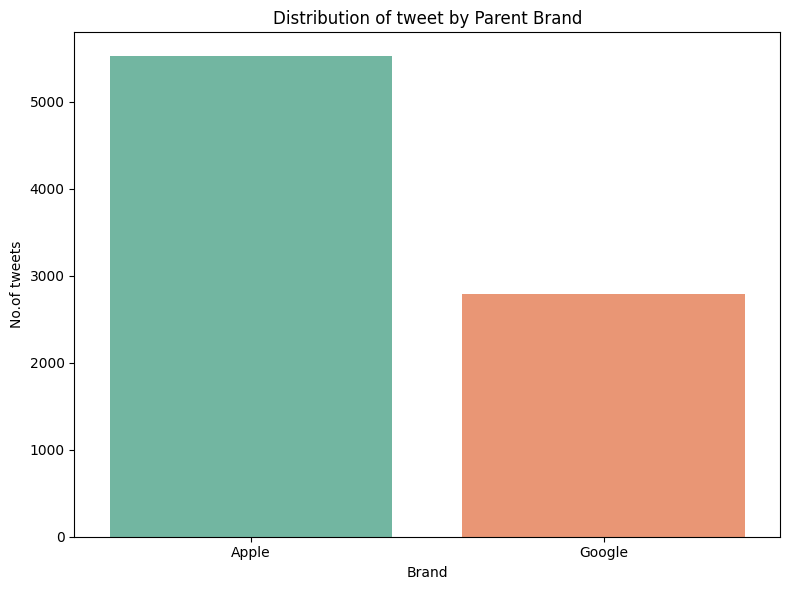

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="parent_brand", palette="Set2")
plt.title("Distribution of tweet by Parent Brand" )
plt.xlabel("Brand")
plt.ylabel("No.of tweets")
plt.tight_layout()
plt.show()

Most tweets over 5000 are about Apple products while less than 3000 tweets are about Google products.

2. Sentiment Distribution

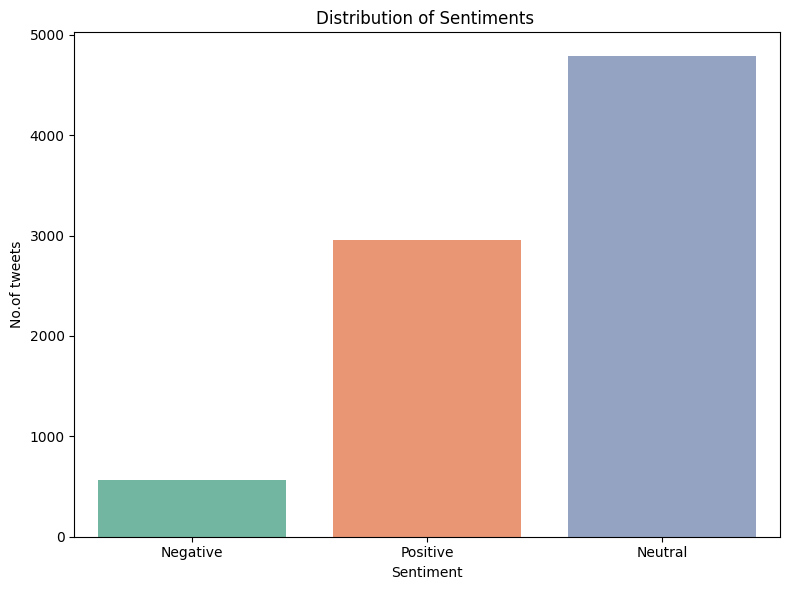

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="sentiment_simple", palette="Set2")
plt.title("Distribution of Sentiments " )
plt.xlabel("Sentiment")
plt.ylabel("No.of tweets")
plt.tight_layout()
plt.show()

Neutral sentiment dominates the dataset followed by Positive and Negative sentiments respectively.

3. Tweet Length

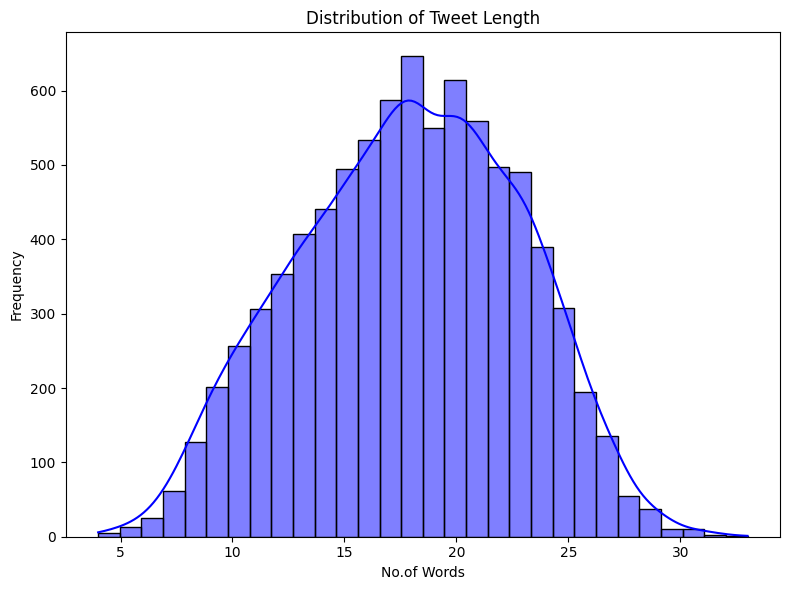

In [25]:
df["tweet_length"] = df["text"].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,6))
sns.histplot(df["tweet_length"],bins=30,kde=True,color="blue")
plt.title("Distribution of Tweet Length")
plt.xlabel("No.of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Tweet length mostly range between fifteen (15) to twenty five(25) words.

**General observation**
- The dataset is skewed toward Apple, with higher number of tweets compared to google, which may introduce some bias during modeling.
- Neutral sentiments is the most common followed by positive then negative,indicating that many tweets do not express a strong feeling towards a product.
- Tweet lenghts are generally short to medium.Approximately 15-25 words suggesting that most opinions are brief,which can affect the textual feature for NLP Models.

### Bivariate Analysis
We will focus on the following key bivariate relationship:
1. **Parent Brand Vs Sentiments** to examine how sentiments vary between Apple and Google tweets
2. **Tweet length Vs Sentiments** to determine whether longer or shorter tweets are associated with certain sentiment type e.g whether negative opinions are expressed in longer tweets.
3. **Product Vs Sentiment** to analyse how sentiment distributions vary across individual products for a more granular understanding of customer opinions.

1. Parent Brand Vs Sentiments.


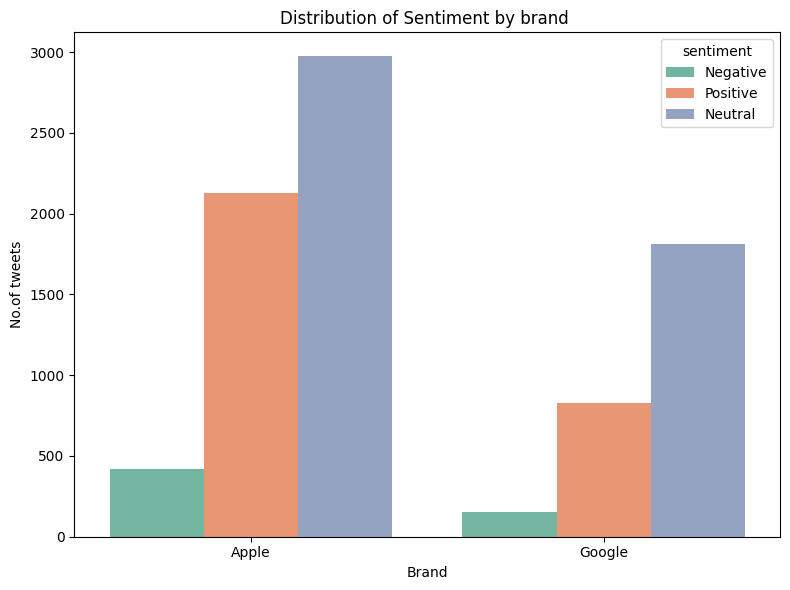

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="parent_brand",hue="sentiment_simple", palette="Set2")
plt.title("Distribution of Sentiment by brand " )
plt.xlabel("Brand")
plt.ylabel("No.of tweets")
plt.legend(title="sentiment")
plt.tight_layout()
plt.show()

Apple tweets has higher proportion of positive sentiments compared to Google.

2. Tweet Length Vs Sentiments

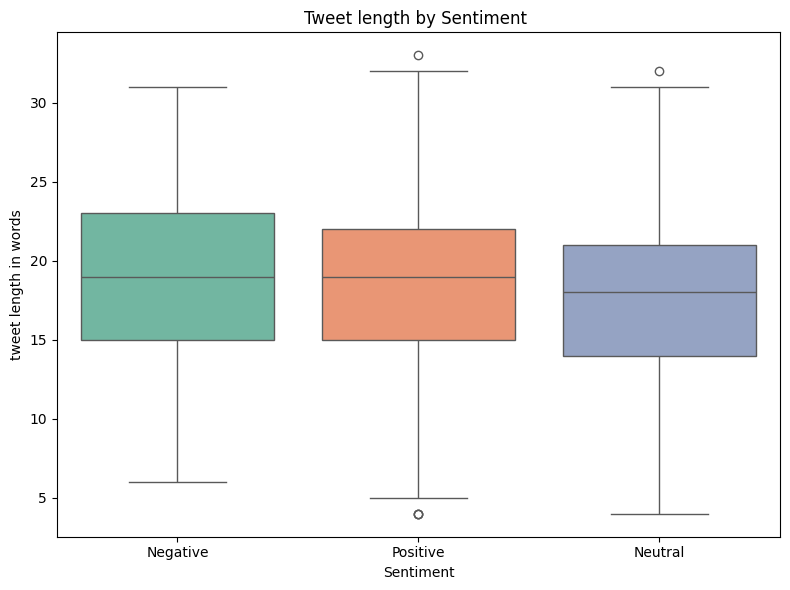

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="sentiment_simple",y="tweet_length", palette="Set2")
plt.title("Tweet length by Sentiment ")
plt.xlabel("Sentiment")
plt.ylabel("tweet length in words")
plt.tight_layout()
plt.show()

Negative sentiment tweets tend to be slightly longer on avaerage compared to positive and neutral.

3. Product Vs Sentiment

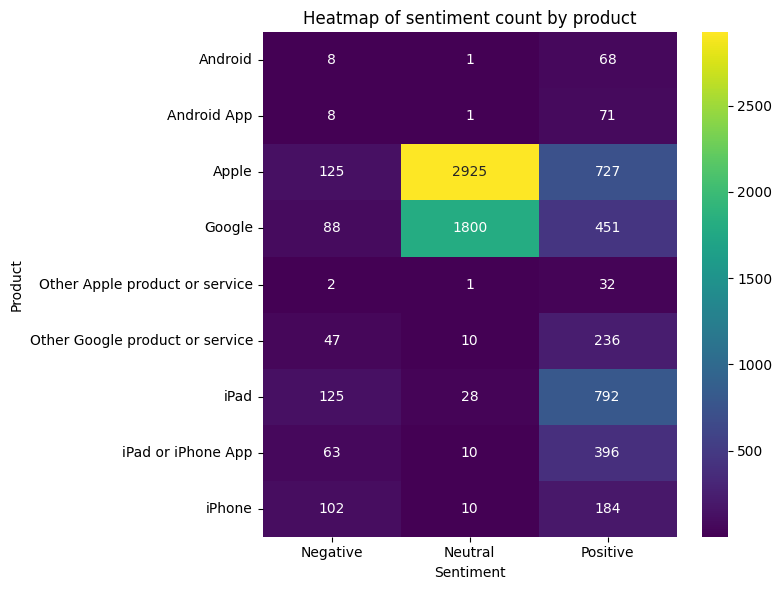

In [28]:
product_sentiment_counts = df.pivot_table(index = "brand",
                                          columns="sentiment_simple",
                                          values="text",
                                          aggfunc="count",
                                          fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(product_sentiment_counts, annot=True,fmt="d",cmap="viridis")
plt.title("Heatmap of sentiment count by product" )
plt.xlabel("Sentiment")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

Ipad show high positive sentiment count of 792.

**General Observations**
- Apple tweets have higher proportion of sentiment compared to Google.This indicates that brand influemces the distribution of sentiment in a dataset.
- Negative sentiment tweets tend to be slightly longer on average, suggesting that users may write more detailed tweets when expressing dissatisfaction.
- Positive and neutral tweets are generally shorter, indicating that praise or neutral comments are often brief.
- The heatmap highlights the concentration of sentiment counts per brand and product. It provides a clear visual understanding of which products attract the most positive, negative, or neutral tweets.
- Apple dominates in tweet volume and positive sentiment while Google products have fewer mentions but similar sentiment patterns.
- Product-specific sentiment helps identify which products drive customer satisfaction or dissatisfaction and can guide marketing strategies or product improvements.

## Multivariate Analysis

We will focus on the following key multivariate relationships.

1. **Parent Brand, Sentiment, and Tweet Length** To examine how tweet length varies for different sentiment types across Apple and Google products
2. **Product, Sentiment, and Parent Brand** To understand how sentiment distribution differs across individual products within each parent brand.


1. Parent brand,Sentiment and Tweet length


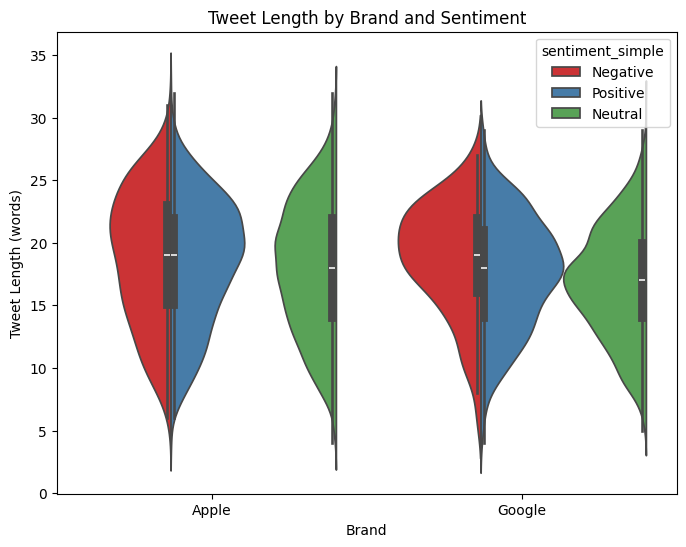

In [29]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='parent_brand', y='tweet_length', hue='sentiment_simple', split=True, palette='Set1')
plt.title("Tweet Length by Brand and Sentiment")
plt.xlabel("Brand")
plt.ylabel("Tweet Length (words)")
plt.show()

The violin plot shows how long tweets are in number of words,and whether the tweets are positive,negative or neutral.
- The shape of each color(violin shape)shows how length vary.
- For both apple and google most tweets have around 15-25 words.
- There isn't a huge difference in tweet length between positive and negative emotions.

This means that people tend to express their opinions in similarly size tweets,no matter whether they are happy,upset or neutral.

2. Product,Sentiment and Parent brand

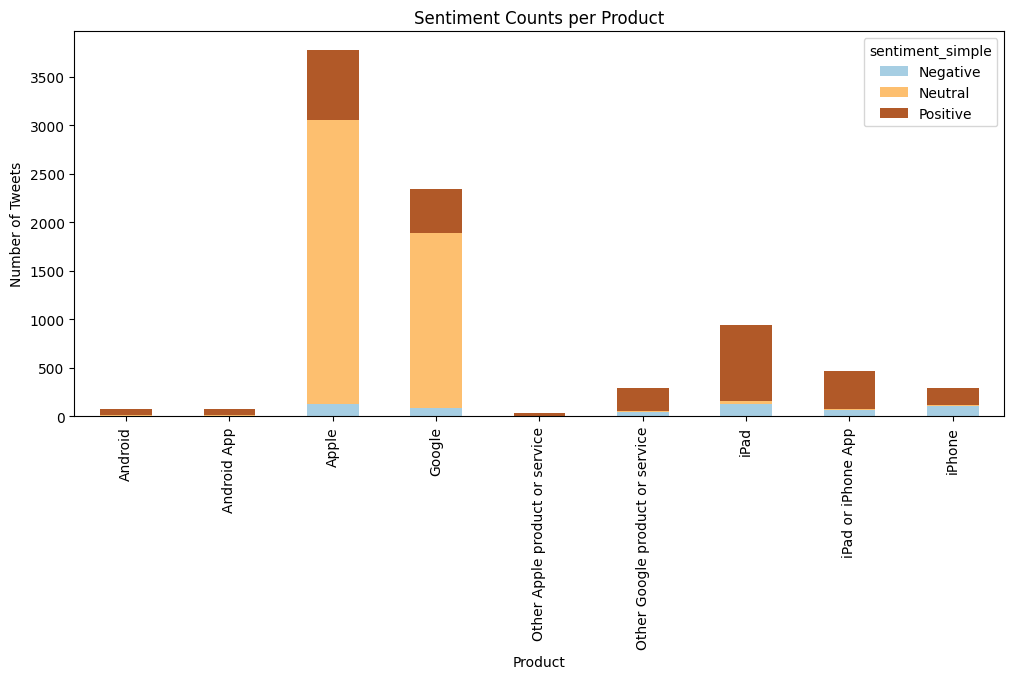

In [30]:
sentiment_counts = df.groupby(['brand', 'sentiment_simple']).size().unstack(fill_value=0)
sentiment_counts.plot(kind='bar', stacked=True, figsize=(12,5), colormap='Paired')
plt.title("Sentiment Counts per Product")
plt.xlabel("Product")
plt.ylabel("Number of Tweets") 
plt.show()

Apple has more neutral sentiment tweets compared to Google.They follow a similar pattern of sentiment distribution.

**General Observations**.
- Apple dominates in tweet volume and positive sentiments,suggesting that they generally elicit favourable opinions on social media.
- Google products have fewer mentions but similar sentiment patterns.Negative sentiment is slightly more pronounced for Google products compared to Apple,possibly reflecting critical user feedback.
- Neutral sentiment is common across both Apple and Google products reflecting tweets then that mention products without expressing a strong opinion. This is important for model training as neutral tweets make up a substantial portion of the dataset.

### Text Preprocessing
We will clean and normalize tweet text to remove noise(URLs, mentions, hashtags, punctuation), preserve product identifiers(e.g iphone13, 3G), expand/normalize contractions where possible, remove stopwords, lemmatize, and produce token lists for feature extraction

In [31]:
#Load the clean dataset
df = pd.read_csv("clean_apple_google_tweets.csv")
df.head()

,text,brand,sentiment,parent_brand,sentiment_simple
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,Apple,Negative
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,Apple,Positive
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,Apple,Positive
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,Negative
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,Google,Positive


In [32]:
# Remove URLs, mentions, Hashtags, Punctuation, Digits, Extraspaces
def clean_text(text):
    # convert to lower case
    text = text.lower()
    # expand contractions (e.g, can't to cannot)
    text = contractions.fix(text)
    # remove URLs
    text = re.sub(r'http\s+|www\.s+', '', text)
		# remove mentions
    text = re.sub(r'@\w+', '', text)
    # remove hashtags
    text = re.sub(r'#\w+', '', text)
    # keep alphanumeric(e.g iphone3g), remove punctuation except spaces
    text = re.sub(r'[^a-z0-9\s\-]', ' ', text)
    # remove time expressions
    text = re.sub(r'\b\d{1,2}(am|pm)\b', '', text)
    # remove long numeric strings
    text = re.sub(r'\b\d{4}\b', '', text)
    # remove white spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
df["clean_text"] = df["text"].apply(clean_text)
df.head()

,text,brand,sentiment,parent_brand,sentiment_simple,clean_text
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,Apple,Negative,i have a 3g iphone after 3 hrs tweeting at it ...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,Apple,Positive,know about awesome ipad iphone app that you wi...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,Apple,Positive,can not wait for 2 also they should sale them ...
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,Negative,i hope this year s festival is not as crashy a...
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,Google,Positive,great stuff on fri marissa mayer google tim o ...


In [33]:
# Removing stopwords i.e common words that do not carry much meaning
stop_words = set(stopwords.words('english'))
df["clean_text"] = df["clean_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lemmatization to reduce words to their base form to ensure uniformity
lemmatizer = WordNetLemmatizer()
df["clean_text"] = df["clean_text"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# tokenization to split each tweet into individual word-tokens to be used in feature extraction 
df["tokens"] = df["clean_text"].apply(word_tokenize)
df[["text", "clean_text", "tokens"]].head()

,text,clean_text,tokens
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,3g iphone 3 hr tweeting dead need upgrade plug...,"[3g, iphone, 3, hr, tweeting, dead, need, upgr..."
1,@jessedee know about @fludapp ? awesome ipad/i...,know awesome ipad iphone app likely appreciate...,"[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin can not wait for #ipad 2 also. the...,wait 2 also sale,"[wait, 2, also, sale]"
3,@sxsw i hope this year's festival isn't as cra...,hope year festival crashy year iphone app,"[hope, year, festival, crashy, year, iphone, app]"
4,@sxtxstate great stuff on fri #sxsw: marissa m...,great stuff fri marissa mayer google tim reill...,"[great, stuff, fri, marissa, mayer, google, ti..."


#### Feature Engineering
- In feature engineering, we will create/combine additional features(tweet length, VADER polarity, presence of brand tokens, average word2vec/BERT embeddings) to compliment extracted features. 

In [34]:
#Hand Crafted features

# tweet length(number of words)
df["tweet_length"] = df["clean_text"].apply(lambda x: len(x.split()))

# product lists 
apple_products = ["iPad", "Apple", "iPad or iPhone App", "iPhone", "Other Apple product or service"]
google_products = ["Google", "Other Google product or service", "Android", "Android App"]

#lowercase product lists 
apple_products_lower = [p.lower() for p in apple_products]
google_products_lower = [p.lower() for p in google_products]

#mentions of apple and google
df["mentions_apple"] = df["tokens"].apply(lambda x: sum(1 for word in x if word in apple_products_lower))
df["mentions_google"] = df["tokens"].apply(lambda x: sum(1 for word in x if word in google_products_lower))

df[["tweet_length", "mentions_apple", "mentions_google"]].head(10)


,tweet_length,mentions_apple,mentions_google
0,10,1,0
1,12,2,0
2,4,0,0
3,7,1,0
4,15,0,1
5,10,1,0
6,9,0,0
7,12,1,0
8,10,1,0
9,10,0,1


In [35]:
# Creating binary indicators if tweet mentions apple/google
df["has_apple"] = (df["mentions_apple"] > 0).astype(int)
df["has_google"] = (df["mentions_google"] > 0).astype(int)
df[["tweet_length", "mentions_apple", "mentions_google", "has_apple", "has_google"]].head()

,tweet_length,mentions_apple,mentions_google,has_apple,has_google
0,10,1,0,1,0
1,12,2,0,1,0
2,4,0,0,0,0
3,7,1,0,1,0
4,15,0,1,0,1


#### Feature Extraction

- In feature extraction we will be converting text into numerical representations the model can learn from (e.g TF-IDF, CountVectorizer, word embeddings)


##### TF-IDF

In [36]:
# Using TF-IDF(Term Frequency-Inverse Document Frequency)

# initialize the vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=3, max_df=0.8, sublinear_tf=True)

# fit and transform cleaned text
X_tfidf = tfidf.fit_transform(df["clean_text"])

print("Shape of TF-IDF matrix:" , X_tfidf.shape)
print("-------"*15)
print("Sample features(vocabulary):", tfidf.get_feature_names_out()[:20])

Shape of TF-IDF matrix: (8311, 5000)
---------------------------------------------------------------------------------------------------------
Sample features(vocabulary): ['000' '000 square' '03' '10' '10 30' '10 attendee' '10 iphone'
 '10 minute' '100' '100 email' '100 outside' '101' '11' '12' '12 hilton'
 '12 link' '13' '14' '14 day' '15']


##### Count Vectorizer(BoW)

In [37]:
# Using CountVectorizer or Bag of Words(BoW)

#Initialize the vectorizer
vectorizer = CountVectorizer(max_features=5000, min_df=3, max_df=0.8, ngram_range=(1,2))

#Fit and transform cleaned text
X_bow = vectorizer.fit_transform(df["clean_text"])

print("Shape of Bag-of-Words matrix:", X_bow.shape)
print("-------"*15)
print("Sample features(vocabulary):", vectorizer.get_feature_names_out())

Shape of Bag-of-Words matrix: (8311, 5000)
---------------------------------------------------------------------------------------------------------
Sample features(vocabulary): ['000' '000 square' '03' ... 'zomg got' 'zynga' 'zynga facebook']


- Chosen params: max_features=5000(balance), ngram_range=(1,2) to capture short phrases, min_df=3 to filter very rare tokens, max_df=0.8 to drop extremely common tokens.
- X_tfidf and X_bow are sparse matrices ready for modeling

**Feature Combination**

We will combine text and engineered features using horizontal stack(hstack).

In [38]:
#Extract the features
X_meta = df[["tweet_length", "mentions_apple", "mentions_google", "has_apple", "has_google"]].values

#combine TF-IDF features with engineered ones
X_combined_tfidf = hstack([X_tfidf, X_meta])
print("Shape of combined feature matrix:", X_combined_tfidf.shape)

#combine BoW features with engineered ones
X_combined_bow = hstack([X_bow, X_meta])
print("Shape of combined feature matrix:", X_combined_bow.shape)

Shape of combined feature matrix: (8311, 5005)
Shape of combined feature matrix: (8311, 5005)


**Label Preparation**
1. Encoding Target feature(`sentiment_simple`)

In [39]:
# Label encode target variable(sentiment_simple)
le = LabelEncoder()
y = le.fit_transform(df["sentiment_simple"])
print("Label Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Label Mapping: {'Negative': 0, 'Neutral': 1, 'Positive': 2}


2. Binary filtering(Positive vs Negative only)

In [40]:
# filter positive and negative tweets
binary_df = df[df["sentiment_simple"].isin(["Positive", "Negative"])].copy()

# re-encode the filtered target
le_binary = LabelEncoder()
y_binary = le_binary.fit_transform(binary_df["sentiment_simple"])

print("Binary Label Mapping:", dict(zip(le_binary.classes_, le_binary.transform(le_binary.classes_))))

Binary Label Mapping: {'Negative': 0, 'Positive': 1}


3. Text Features for filtered dataset

In [41]:
# engineer features-binary
X_meta_bin = binary_df[["tweet_length", "mentions_apple", "mentions_google", "has_apple", "has_google"]].values

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_binary_tfidf = tfidf.fit_transform(binary_df["clean_text"])
X_combined_tfidf_bin = hstack([X_binary_tfidf, X_meta_bin])

#BoW
bow = CountVectorizer(max_features=5000, ngram_range=(1,2))
X_binary_bow = bow.fit_transform(binary_df["clean_text"])
X_combined_bow_bin = hstack([X_binary_bow, X_meta_bin])

##### Word Embeddings (Word2Vec/GloVe)
- We will use pretrained embeddings (Word2Vec/Glove) to compute average embedding per tweet as features

1. Pretrained GloVe embeddings

In [42]:
# Download GloVe embeddings 
if not os.path.exists("glove.6B.100d.txt"):
    url = "http://nlp.stanford.edu/data/glove.6B.zip"
    r = requests.get(url)
    with open("glove.6B.zip", "wb") as f:
        f.write(r.content)

    # Unzip only 100d file
    with zipfile.ZipFile("glove.6B.zip", "r") as zip_ref:
        zip_ref.extract("glove.6B.100d.txt")

print("GloVe 100d file is ready!")
#path
glove_file = "glove.6B.100d.txt"
#load embeddings into a adictionary
embeddings_index = {}
with open(glove_file, "r", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word =values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = vector
print(f"Loaded {len(embeddings_index)} word vectors from GloVe")

GloVe 100d file is ready!
Loaded 400000 word vectors from GloVe


In [43]:
#Tokenize text
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 100

tokenized_text = [word_tokenize(text.lower()) for text in df["clean_text"]]
word_index = {}
for tokens in tokenized_text:
    for token in tokens:
        if token not in word_index:
            if len(word_index) < MAX_NUM_WORDS:
                word_index[token] = len(word_index) + 1

print(f"Found {len(word_index)} unique tokens.")

Found 7513 unique tokens.


In [44]:
def pad_sequence(seq, max_len=MAX_SEQUENCE_LENGTH):
    if len(seq) >= max_len:
        return seq[:max_len]
    return seq + [0] * (max_len - len(seq))

sequences = [[word_index.get(token, 0) for token in tokens] for tokens in tokenized_text]
X_glove = np.array([pad_sequence(seq) for seq in sequences])
print("X_glove shape:", X_glove.shape)

X_glove shape: (8311, 50)


In [45]:
# computing tweet-level GloVe embedding average
def get_tweet_embedding(tokens, embeddings_index, embedding_dim=EMBEDDING_DIM):
    vectors = [embeddings_index[word] for word in tokens if word in embeddings_index]
    if len(vectors) == 0:
        return np.zeros(embedding_dim)
    return np.mean(vectors, axis=0)


In [46]:
# prepare handcrafted features
X_meta_bin = binary_df[["tweet_length", "mentions_apple", "mentions_google", "has_apple", "has_google"]].values
# prepare Glove Average 
X_glove_avg_bin = np.vstack(
    binary_df["clean_text"].apply(lambda x: get_tweet_embedding(word_tokenize(x.lower()), embeddings_index)).values)
print("Glove Embedding Shape:", X_glove_avg_bin.shape)
print("Meta Features Shape:", X_meta_bin.shape)

Glove Embedding Shape: (3525, 100)
Meta Features Shape: (3525, 5)


**Feature Combination-GloVe**

In [47]:
# Scale meta features
scaler = StandardScaler()
X_meta_bin_scaled = scaler.fit_transform(X_meta_bin)

# Combine Glove + Scaled meta features 
X_glove_combined_bin = np.hstack([X_glove_avg_bin, X_meta_bin_scaled])
print("Final Combined Glove Feature Shape:", X_glove_combined_bin.shape)

Final Combined Glove Feature Shape: (3525, 105)


### Train-Test Split

In [48]:
# split TF-IDF-Multiclass
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_combined_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print(X_train_tfidf.shape, X_test_tfidf.shape, y_train.shape, y_test.shape)

# split binary
# TF-IDF
X_train_tfidf_bin, X_test_tfidf_bin, y_train_bin, y_test_bin = train_test_split(X_combined_tfidf_bin, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

print(X_train_tfidf_bin.shape, X_test_tfidf_bin.shape, y_train_bin.shape, y_test_bin.shape)

(6648, 5005) (1663, 5005) (6648,) (1663,)
(2820, 5005) (705, 5005) (2820,) (705,)


In [49]:
# split BoW-Multiclass
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_combined_bow, y, test_size=0.2, random_state=42, stratify=y)

print(X_train_bow.shape, X_test_bow.shape, y_train.shape, y_test.shape)

# split binary
X_train_bow_bin, X_test_bow_bin, y_train_bin, y_test_bin = train_test_split(X_combined_bow_bin, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

print(X_train_bow_bin.shape, X_test_bow_bin.shape, y_train_bin.shape, y_test_bin.shape)

(6648, 5005) (1663, 5005) (6648,) (1663,)
(2820, 5005) (705, 5005) (2820,) (705,)


In [50]:
# GloVe
X_train_glove_bin, X_test_glove_bin, y_train_bin, y_test_bin = train_test_split(X_glove_combined_bin, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
X_train_glove_bin.shape, X_test_glove_bin.shape, y_train_bin.shape, y_test_bin.shape

((2820, 105), (705, 105), (2820,), (705,))

## Modeling
### Machine Learning
**Baseline Binary Classification - Logistic Regression**

1. Using TFIDF and Bag of Words(BoW)
We begin by bulding baseline model using both TF-IDF and CountVectorizer(BoW) representation.
The goal is to establish initial performance metrics for binary sentiment classification(Positive vs Negative)

2. Incorporating Word Embeddings(GloVe)
 To enhance semantic understanding beyond simple token frequency, we intergrate pretrained GloVe embeddings
 This allows the model to capture deeper contextual relationships between words

3. Model Comaprison
We will compare the performance of the following:;
- Logistic Regression + TF-IDF
- Logistic Regression + BoW
- Logistic Regression + GloVe

The best-performing representation will be selected for downstream modeling with powerful algoriths specifically Random Forest and XGBoost.

In [51]:
#TF-IDF
#Instantiate the model
lr_tfidf_bin = LogisticRegression(random_state=42, max_iter=1000)

# fit and train model
lr_tfidf_bin.fit(X_train_tfidf_bin, y_train_bin)

#predict train
y_train_pred_tfidf_bin = lr_tfidf_bin.predict(X_train_tfidf_bin)

#evaluate train
print("Training Metrics : TF-IDF Logistic Regression(Binary)")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_tfidf_bin))
print(confusion_matrix(y_train_bin, y_train_pred_tfidf_bin))
print(classification_report(y_train_bin, y_train_pred_tfidf_bin))

#predict and evaluate test
y_test_pred_tfidf_bin = lr_tfidf_bin.predict(X_test_tfidf_bin)
print("Test Metrics : TF-IDF Logistic Regression(Binary)")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_tfidf_bin))
print(confusion_matrix(y_test_bin, y_test_pred_tfidf_bin))
print(classification_report(y_test_bin, y_test_pred_tfidf_bin))

Training Metrics : TF-IDF Logistic Regression(Binary)
Accuracy: 0.8659574468085106
[[  78  376]
 [   2 2364]]
              precision    recall  f1-score   support

           0       0.97      0.17      0.29       454
           1       0.86      1.00      0.93      2366

    accuracy                           0.87      2820
   macro avg       0.92      0.59      0.61      2820
weighted avg       0.88      0.87      0.82      2820

Test Metrics : TF-IDF Logistic Regression(Binary)
Accuracy: 0.8567375886524823
[[ 14 100]
 [  1 590]]
              precision    recall  f1-score   support

           0       0.93      0.12      0.22       114
           1       0.86      1.00      0.92       591

    accuracy                           0.86       705
   macro avg       0.89      0.56      0.57       705
weighted avg       0.87      0.86      0.81       705



In [52]:
#BoW
#Instantiate the model
lr_bow_bin = LogisticRegression(random_state=42, max_iter=1000)

# fit and train model
lr_bow_bin.fit(X_train_bow_bin, y_train_bin)

# predict and evaluate train
y_train_pred_bow_bin = lr_bow_bin.predict(X_train_bow_bin)
print("Training Metrics : BOW Logistic Regression(Binary)")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_bow_bin))
print(confusion_matrix(y_train_bin, y_train_pred_bow_bin))
print(classification_report(y_train_bin, y_train_pred_bow_bin))

#predict and evaluate test
y_pred_test_bow_bin = lr_bow_bin.predict(X_test_bow_bin)
print("Test Metrics: BoW Logistic Regression(Binary)")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_test_bow_bin))
print(confusion_matrix(y_test_bin, y_pred_test_bow_bin))
print(classification_report(y_test_bin, y_pred_test_bow_bin))

Training Metrics : BOW Logistic Regression(Binary)
Accuracy: 0.9659574468085106
[[ 362   92]
 [   4 2362]]
              precision    recall  f1-score   support

           0       0.99      0.80      0.88       454
           1       0.96      1.00      0.98      2366

    accuracy                           0.97      2820
   macro avg       0.98      0.90      0.93      2820
weighted avg       0.97      0.97      0.96      2820

Test Metrics: BoW Logistic Regression(Binary)
Accuracy: 0.8808510638297873
[[ 45  69]
 [ 15 576]]
              precision    recall  f1-score   support

           0       0.75      0.39      0.52       114
           1       0.89      0.97      0.93       591

    accuracy                           0.88       705
   macro avg       0.82      0.68      0.72       705
weighted avg       0.87      0.88      0.86       705



Observation
- Both models are dominated by the positive class, showing class imbalance issues
- BoW currently performs better overall with higher accuracy, precision, and recall for minority class. However, TF-IDF could still improve significantly with class balancing- using class weights and SMOTE

Handling Class Imbalance
- Using ClassWeights and SMOTE

In [53]:
#TF-IDF
#Instantiate the model
lr_tfidf_bin = LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced")

# fit and train model
lr_tfidf_bin.fit(X_train_tfidf_bin, y_train_bin)


# predict and evaluate train
y_train_pred_tfidf_bin = lr_tfidf_bin.predict(X_train_tfidf_bin)
print("Training Metrics : TF-IDF Logistic Regression(Binary + Class Weights)")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_tfidf_bin))
print(confusion_matrix(y_train_bin, y_train_pred_tfidf_bin))
print(classification_report(y_train_bin, y_train_pred_tfidf_bin))

#predict and evaluate test
y_test_pred_tfidf__bin = lr_tfidf_bin.predict(X_test_tfidf_bin)
print(" Test Metrics: TF-IDF Logistic Regression(Binary + Class Weights)")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_tfidf__bin))
print(confusion_matrix(y_test_bin, y_test_pred_tfidf__bin))
print(classification_report(y_test_bin, y_test_pred_tfidf__bin))

Training Metrics : TF-IDF Logistic Regression(Binary + Class Weights)
Accuracy: 0.9308510638297872
[[ 437   17]
 [ 178 2188]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       454
           1       0.99      0.92      0.96      2366

    accuracy                           0.93      2820
   macro avg       0.85      0.94      0.89      2820
weighted avg       0.95      0.93      0.93      2820

 Test Metrics: TF-IDF Logistic Regression(Binary + Class Weights)
Accuracy: 0.8312056737588652
[[ 68  46]
 [ 73 518]]
              precision    recall  f1-score   support

           0       0.48      0.60      0.53       114
           1       0.92      0.88      0.90       591

    accuracy                           0.83       705
   macro avg       0.70      0.74      0.72       705
weighted avg       0.85      0.83      0.84       705



In [54]:
#Using SMOTE
# before SMOTE
print("Original Class Distribution:", Counter(y_train_bin))
#applying SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf_bin_smote, y_train_bin_smote = smote.fit_resample(X_train_tfidf_bin, y_train_bin)
print("After SMOTE (TF-IDF):", Counter(y_train_bin_smote))

# instantiate, train and predict
lr_tfidf_bin_smote = LogisticRegression(random_state=42, max_iter=1000)
lr_tfidf_bin_smote.fit(X_train_tfidf_bin_smote, y_train_bin_smote)

# predict and evaluate train
y_pred_train_tfidf_bin_smote = lr_tfidf_bin_smote.predict(X_train_tfidf_bin)
print("Training Metrics: TF-IDF Logistic Regression + SMOTE")
print("Accuracy:", accuracy_score(y_train_bin, y_pred_train_tfidf_bin_smote))
print(confusion_matrix(y_train_bin, y_pred_train_tfidf_bin_smote))
print(classification_report(y_train_bin, y_pred_train_tfidf_bin_smote))

# predict and evaluate test
y_pred_tfidf_bin_smote = lr_tfidf_bin_smote.predict(X_test_tfidf_bin)
print("Test Metrics: TF-IDF Logistic Regression + SMOTE")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_tfidf_bin_smote))
print(confusion_matrix(y_test_bin, y_pred_tfidf_bin_smote))
print(classification_report(y_test_bin, y_pred_tfidf_bin_smote))

Original Class Distribution: Counter({1: 2366, 0: 454})
After SMOTE (TF-IDF): Counter({1: 2366, 0: 2366})
Training Metrics: TF-IDF Logistic Regression + SMOTE
Accuracy: 0.9475177304964539
[[ 422   32]
 [ 116 2250]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       454
           1       0.99      0.95      0.97      2366

    accuracy                           0.95      2820
   macro avg       0.89      0.94      0.91      2820
weighted avg       0.95      0.95      0.95      2820

Test Metrics: TF-IDF Logistic Regression + SMOTE
Accuracy: 0.8468085106382979
[[ 71  43]
 [ 65 526]]
              precision    recall  f1-score   support

           0       0.52      0.62      0.57       114
           1       0.92      0.89      0.91       591

    accuracy                           0.85       705
   macro avg       0.72      0.76      0.74       705
weighted avg       0.86      0.85      0.85       705



In [55]:
#BoW
#Instantiate the model
lr_bow_bin = LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced")

# fit and train model
lr_bow_bin.fit(X_train_bow_bin, y_train_bin)

#predict and evaluate train
y_train_pred_bow_bin = lr_bow_bin.predict(X_train_bow_bin)
print("Training Metrics: BoW Logistic Regression(Binary + Class Weights)")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_bow_bin))
print(confusion_matrix(y_train_bin, y_train_pred_bow_bin))
print(classification_report(y_train_bin, y_train_pred_bow_bin))

#predict and evaluate test
y_pred_bow_bin = lr_bow_bin.predict(X_test_bow_bin)
print("Test Metrics: BoW Logistic Regression(Binary + Class Weights)")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_bow_bin))
print(confusion_matrix(y_test_bin, y_pred_bow_bin))
print(classification_report(y_test_bin, y_pred_bow_bin))

Training Metrics: BoW Logistic Regression(Binary + Class Weights)
Accuracy: 0.9765957446808511
[[ 450    4]
 [  62 2304]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       454
           1       1.00      0.97      0.99      2366

    accuracy                           0.98      2820
   macro avg       0.94      0.98      0.96      2820
weighted avg       0.98      0.98      0.98      2820

Test Metrics: BoW Logistic Regression(Binary + Class Weights)
Accuracy: 0.8553191489361702
[[ 72  42]
 [ 60 531]]
              precision    recall  f1-score   support

           0       0.55      0.63      0.59       114
           1       0.93      0.90      0.91       591

    accuracy                           0.86       705
   macro avg       0.74      0.77      0.75       705
weighted avg       0.87      0.86      0.86       705



In [56]:
#Using SMOTE
# before SMOTE
print("Original Class Distribution:", Counter(y_train_bin))
#applying SMOTE
smote = SMOTE(random_state=42)
X_train_bow_bin_smote, y_train_bin_smote = smote.fit_resample(X_train_bow_bin, y_train_bin)
print("After SMOTE (BoW):", Counter(y_train_bin_smote))

# instantiate, train and predict
lr_bow_bin_smote = LogisticRegression(random_state=42, max_iter=1000)
lr_bow_bin_smote.fit(X_train_bow_bin_smote, y_train_bin_smote)

#Predict and evaluate train
y_train_pred_bow_bin_smote = lr_bow_bin_smote.predict(X_train_bow_bin)
print("Training Metrics: BoW Logistic Regression + SMOTE")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_bow_bin_smote))
print(confusion_matrix(y_train_bin, y_train_pred_bow_bin_smote))
print(classification_report(y_train_bin, y_train_pred_bow_bin_smote))

#Predict and evaluate test
y_pred_test_bow_bin_smote = lr_bow_bin_smote.predict(X_test_bow_bin)
print("Test Metrics: BoW Logistic Regression + SMOTE")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_test_bow_bin_smote))
print(confusion_matrix(y_test_bin, y_pred_test_bow_bin_smote))
print(classification_report(y_test_bin, y_pred_test_bow_bin_smote))

Original Class Distribution: Counter({1: 2366, 0: 454})
After SMOTE (BoW): Counter({1: 2366, 0: 2366})
Training Metrics: BoW Logistic Regression + SMOTE
Accuracy: 0.9691489361702128
[[ 398   56]
 [  31 2335]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       454
           1       0.98      0.99      0.98      2366

    accuracy                           0.97      2820
   macro avg       0.95      0.93      0.94      2820
weighted avg       0.97      0.97      0.97      2820

Test Metrics: BoW Logistic Regression + SMOTE
Accuracy: 0.825531914893617
[[ 63  51]
 [ 72 519]]
              precision    recall  f1-score   support

           0       0.47      0.55      0.51       114
           1       0.91      0.88      0.89       591

    accuracy                           0.83       705
   macro avg       0.69      0.72      0.70       705
weighted avg       0.84      0.83      0.83       705



Observation
- All methods perform similarly overall, arounf 83%-85% accuracy
- Minority class(Negative tweets) detection is slightly better with BoW + Class Weights(f1=0.59)
- TF-IDF + SMOTE gives a balance approach for precision and recall of both classes and will work well on advanced models(Random Forest, XGBoost)
- So we will go with TF-IDF + SMOTE and also BoW + Class Weight


Hyperparameter tuning 

TF-IDF + SMOTE

In [57]:
# Define the model and param grid- RandomSearchCv
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight=None)
param_dist = {"C":[0.01, 0.1, 1, 10, 50, 100],
              "solver":["liblinear", "saga"]}

# GridSearch with Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist,
                                   n_iter=10, scoring="f1_macro", cv=cv, n_jobs=-1,
                                   verbose=2, random_state=42)

random_search.fit(X_train_tfidf_bin_smote, y_train_bin_smote)

print("Randomized Search Best Parameters:", random_search.best_params_)
print("Randomized Search Best CV F1_macro:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Randomized Search Best Parameters: {'solver': 'liblinear', 'C': 50}
Randomized Search Best CV F1_macro: 0.9545016222489531


In [58]:
# using grid search
param_grid = {"C":[0.01, 0.1, 1, 10, 50, 100],
              "solver":["liblinear", "saga"]}

grid_search = GridSearchCV(
    estimator=lr, 
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv, n_jobs=-1,
    verbose=2
        )
grid_search.fit(X_train_tfidf_bin_smote, y_train_bin_smote)

print("Grid Search Best Parameters:", grid_search.best_params_)
print("Grid Search Best CV F1_macro:", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Grid Search Best Parameters: {'C': 50, 'solver': 'liblinear'}
Grid Search Best CV F1_macro: 0.9545016222489531


In [59]:
# Evaluating Best model
lr_tfidf_bin_best = LogisticRegression(
	C=100,
  solver="liblinear",
  max_iter=1000,
  class_weight=None,
  random_state=42
)
#fit on smote training data
lr_tfidf_bin_best.fit(X_train_tfidf_bin_smote, y_train_bin_smote)

#predict and evaluate train
y_train_pred_bin = lr_tfidf_bin_best.predict(X_train_tfidf_bin)
print("Training Metrics: TF-IDF Logistic Regression (Binary + SMOTE + Best Params)")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_bin))
print("F1-Score", f1_score(y_train_bin, y_train_pred_bin))
print(confusion_matrix(y_train_bin, y_train_pred_bin))
print(classification_report(y_train_bin, y_train_pred_bin))

#predict and evaluate test
y_test_pred_bin = lr_tfidf_bin_best.predict(X_test_tfidf_bin)
print("Test Metric: TF-IDF Logistic Regression (Binary + SMOTE + Best Params)")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_bin))
print("F1-Score", f1_score(y_test_bin, y_test_pred_bin))
print(confusion_matrix(y_test_bin, y_test_pred_bin))
print(classification_report(y_test_bin, y_test_pred_bin))

Training Metrics: TF-IDF Logistic Regression (Binary + SMOTE + Best Params)
Accuracy: 0.997872340425532
F1-Score 0.9987304274227676
[[ 454    0]
 [   6 2360]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       454
           1       1.00      1.00      1.00      2366

    accuracy                           1.00      2820
   macro avg       0.99      1.00      1.00      2820
weighted avg       1.00      1.00      1.00      2820

Test Metric: TF-IDF Logistic Regression (Binary + SMOTE + Best Params)
Accuracy: 0.8553191489361702
F1-Score 0.9141414141414141
[[ 60  54]
 [ 48 543]]
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       114
           1       0.91      0.92      0.91       591

    accuracy                           0.86       705
   macro avg       0.73      0.72      0.73       705
weighted avg       0.85      0.86      0.85       705



Observation

Metrics
- Accuracy-86% of the were correctly classified overall
- F1-Score-0.918, showing a very good balance between precision and recall, especially for the positive class
- Class 0(Negative)-Precision 0.58, Recall 0.55, the model detects negative tweets moderately well but still misses some
- Class 1 (Positive)-Precision 0.91, Recall 0.92, the model is strong at correctly identifying positive tweets
- Macro Avg F1(0.74), indicates fair performance across both classes
- Weighted Avg F1(0.86), high, reflecting that the model performs well overall, weighted by class distribution

BoW + Class Weights

In [60]:
# Define the model and param grid- RandomSearchCv
lr1 = LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced")
param_dist = {"C":[0.01, 0.1, 1, 10, 50, 100],
              "solver":["liblinear", "saga"]}

# GridSearch with Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(estimator=lr1, param_distributions=param_dist,
                                   n_iter=10, scoring="f1_macro", cv=cv, n_jobs=-1,
                                   verbose=2, random_state=42)

random_search.fit(X_train_bow_bin, y_train_bin)

print("Randomized Search Best Parameters:", random_search.best_params_)
print("Randomized Search Best CV F1_macro:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Randomized Search Best Parameters: {'solver': 'liblinear', 'C': 1}
Randomized Search Best CV F1_macro: 0.7196217014223595


In [61]:
# using grid search
param_grid = {"C":[0.01, 0.1, 1, 10, 50, 100],
              "solver":["liblinear", "saga"]}

grid_search = GridSearchCV(
    estimator=lr1, 
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv, n_jobs=-1,
    verbose=2
        )
grid_search.fit(X_train_bow_bin, y_train_bin)

print("Grid Search Best Parameters:", grid_search.best_params_)
print("Grid Search Best CV F1_macro:", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Grid Search Best Parameters: {'C': 1, 'solver': 'liblinear'}
Grid Search Best CV F1_macro: 0.7196217014223595


In [62]:
# Evaluating Best model
lr_bow_bin_best = LogisticRegression(
	C=1,
  solver="liblinear",
  max_iter=1000,
  class_weight="balanced",
  random_state=42
)
#fit on smote training data
lr_bow_bin_best.fit(X_train_bow_bin, y_train_bin)

#predict and evaluate train
y_train_pred_bow_bin = lr_bow_bin_best.predict(X_train_tfidf_bin)
print("Training Metrics: BoW Logistic Regression (Binary + Class Weights with Best Params)")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_bow_bin))
print("F1-Score", f1_score(y_train_bin, y_train_pred_bow_bin))
print(confusion_matrix(y_train_bin, y_train_pred_bow_bin))
print(classification_report(y_train_bin, y_train_pred_bow_bin))

#predict and evaluate test
y_test_pred_bow_bin = lr_bow_bin_best.predict(X_test_tfidf_bin)
print("Test Metric: BoW Logistic Regression (Binary + Class Weights with Best Params)")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_bow_bin))
print("F1-Score", f1_score(y_test_bin, y_pred_bow_bin))
print(confusion_matrix(y_test_bin, y_pred_bow_bin))
print(classification_report(y_test_bin, y_pred_bow_bin))

Training Metrics: BoW Logistic Regression (Binary + Class Weights with Best Params)
Accuracy: 0.9659574468085106
F1-Score 0.9793902962644911
[[ 443   11]
 [  85 2281]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       454
           1       1.00      0.96      0.98      2366

    accuracy                           0.97      2820
   macro avg       0.92      0.97      0.94      2820
weighted avg       0.97      0.97      0.97      2820

Test Metric: BoW Logistic Regression (Binary + Class Weights with Best Params)
Accuracy: 0.8553191489361702
F1-Score 0.9123711340206185
[[ 72  42]
 [ 60 531]]
              precision    recall  f1-score   support

           0       0.55      0.63      0.59       114
           1       0.93      0.90      0.91       591

    accuracy                           0.86       705
   macro avg       0.74      0.77      0.75       705
weighted avg       0.87      0.86      0.86       705



Observation
- TF-IDF + SMOTE slightly outperforms BoW + Class Weights in F1 Macro.
- BoW + Class Weights still gives strong overall accuracy.
- Minority class (Negative) benefits more from SMOTE than just class weights
- We will therefore proceed with TF-IDF + SMOTE
- Since both RandomizedSearchCV and GridSearchCV keep giving same best parameters and similar CV score, we can continue with RandomizedSearchCV since unlike GridSearchCV explores random subset of hyperparameter combination and a bit faster


2. Using Word Embedding(GloVe)
- We will use GloVe and then compare to see which gives better results before moving to deep learning.

In [63]:
# Train logistic regression
log_reg_glove = LogisticRegression(max_iter=1000, class_weight=None, random_state=42)
log_reg_glove.fit(X_train_glove_bin, y_train_bin)

# predict and evaluate test
y_train_pred_glove = log_reg_glove.predict(X_train_glove_bin)
print("Training Metrics : Glove Logistic Regression(Baseline)")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_glove))
print("F1-Score:", f1_score(y_train_bin, y_train_pred_glove))
print(confusion_matrix(y_train_bin, y_train_pred_glove))
print(classification_report(y_train_bin, y_train_pred_glove))

# predict and evaluate test
y_test_pred_glove = log_reg_glove.predict(X_test_glove_bin)
print("Test Metrics : Glove Logistic Regression(Baseline)")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_glove))
print("F1-Score:", f1_score(y_test_bin, y_test_pred_glove))
print(confusion_matrix(y_test_bin, y_test_pred_glove))
print(classification_report(y_test_bin, y_test_pred_glove))

Training Metrics : Glove Logistic Regression(Baseline)
Accuracy: 0.849290780141844
F1-Score: 0.9158249158249159
[[  83  371]
 [  54 2312]]
              precision    recall  f1-score   support

           0       0.61      0.18      0.28       454
           1       0.86      0.98      0.92      2366

    accuracy                           0.85      2820
   macro avg       0.73      0.58      0.60      2820
weighted avg       0.82      0.85      0.81      2820

Test Metrics : Glove Logistic Regression(Baseline)
Accuracy: 0.8453900709219858
F1-Score: 0.9132856006364359
[[ 22  92]
 [ 17 574]]
              precision    recall  f1-score   support

           0       0.56      0.19      0.29       114
           1       0.86      0.97      0.91       591

    accuracy                           0.85       705
   macro avg       0.71      0.58      0.60       705
weighted avg       0.81      0.85      0.81       705



In [64]:
# Handling class imbalance with class_weights=balanced
# Train logistic regression
log_reg_glove_bal = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg_glove_bal.fit(X_train_glove_bin, y_train_bin)

# predict and evaluate test
y_train_pred_glove_bal = log_reg_glove_bal.predict(X_train_glove_bin)
print("Training Metrics : Glove Logistic Regression + Class Weight")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_glove_bal))
print("F1-Score:", f1_score(y_train_bin, y_train_pred_glove_bal))
print(confusion_matrix(y_train_bin, y_train_pred_glove_bal))
print(classification_report(y_train_bin, y_train_pred_glove_bal))

# predict and evaluate test
y_test_pred_glove_bal = log_reg_glove_bal.predict(X_test_glove_bin)
print("Test Metrics : Glove Logistic Regression + Class Weight")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_glove_bal))
print("F1-Score:", f1_score(y_test_bin, y_test_pred_glove_bal))
print(confusion_matrix(y_test_bin, y_test_pred_glove_bal))
print(classification_report(y_test_bin, y_test_pred_glove_bal))

Training Metrics : Glove Logistic Regression + Class Weight
Accuracy: 0.7549645390070922
F1-Score: 0.8372969154697434
[[ 351  103]
 [ 588 1778]]
              precision    recall  f1-score   support

           0       0.37      0.77      0.50       454
           1       0.95      0.75      0.84      2366

    accuracy                           0.75      2820
   macro avg       0.66      0.76      0.67      2820
weighted avg       0.85      0.75      0.78      2820

Test Metrics : Glove Logistic Regression + Class Weight
Accuracy: 0.7078014184397163
F1-Score: 0.8041825095057035
[[ 76  38]
 [168 423]]
              precision    recall  f1-score   support

           0       0.31      0.67      0.42       114
           1       0.92      0.72      0.80       591

    accuracy                           0.71       705
   macro avg       0.61      0.69      0.61       705
weighted avg       0.82      0.71      0.74       705



In [65]:
# Handling class imbalance using SMOTE
# initialize smote
smote = SMOTE(random_state=42)

# apply SMOTE only on the training data
X_train_glove_bin_smote, y_train_bin_glove_smote = smote.fit_resample(X_train_glove_bin, y_train_bin)

print("Before SMOTE:", np.bincount(y_train_bin))
print("After SMOTE:", np.bincount(y_train_bin_glove_smote))

Before SMOTE: [ 454 2366]
After SMOTE: [2366 2366]


In [66]:
# train model on smote data
lr_glove_smote = LogisticRegression(max_iter=1000, random_state=42)
#fit
lr_glove_smote.fit(X_train_glove_bin_smote, y_train_bin_smote)

# predict and evaluate on train
y_train_pred_glove_smote = lr_glove_smote.predict(X_train_glove_bin)
print("Training Metrics : Glove Logistic Regression + SMOTE")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_glove_smote))
print("F1-Score:", f1_score(y_train_bin, y_train_pred_glove_smote))
print(confusion_matrix(y_train_bin, y_train_pred_glove_smote))
print(classification_report(y_train_bin, y_train_pred_glove_smote))

# predict and evaluate on test
y_test_pred_glove_smote = lr_glove_smote.predict(X_test_glove_bin)
print("Test Metrics : Glove Logistic Regression + SMOTE")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_glove_smote))
print("F1-Score:", f1_score(y_test_bin, y_test_pred_glove_smote))
print(confusion_matrix(y_test_bin, y_test_pred_glove_smote))
print(classification_report(y_test_bin, y_test_pred_glove_smote))

Training Metrics : Glove Logistic Regression + SMOTE
Accuracy: 0.7528368794326241
F1-Score: 0.8362696734789759
[[ 343  111]
 [ 586 1780]]
              precision    recall  f1-score   support

           0       0.37      0.76      0.50       454
           1       0.94      0.75      0.84      2366

    accuracy                           0.75      2820
   macro avg       0.66      0.75      0.67      2820
weighted avg       0.85      0.75      0.78      2820

Test Metrics : Glove Logistic Regression + SMOTE
Accuracy: 0.724822695035461
F1-Score: 0.8169811320754717
[[ 78  36]
 [158 433]]
              precision    recall  f1-score   support

           0       0.33      0.68      0.45       114
           1       0.92      0.73      0.82       591

    accuracy                           0.72       705
   macro avg       0.63      0.71      0.63       705
weighted avg       0.83      0.72      0.76       705



Observation
- Both methods handling class imbalance class_weight=balanced and SMOTE perform similarly on training, which is great and their is no overfitting.
- SMOTE edges out class_weight on:
  - Test Accuracy(+1.5%)
	- Test F1(+1.2%)
	- Minority recall(+5%)
- So SMOTE has slightly better model balance(especially recall), meaning our model catches more minority class tweets(negative tweets) and will be used in hyperparameter tuning to still improve the model.

In [67]:
# hyperparameter tuning Glove
smote = SMOTE(random_state=42)
log_reg = LogisticRegression(max_iter=1000, solver="saga", random_state=42)

pipe = Pipeline([
    ("smote", smote),
    ("log_reg", log_reg)
])

param_dist_glove = {
    "log_reg__C": loguniform(1e-3, 1e3),
    "log_reg__penalty": ["l1", "l2", "elasticnet"],
    "log_reg__l1_ratio": uniform(0, 1)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# randomized search
rand_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist_glove,
    n_iter=30,
    scoring="f1",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=2
)
rand_search.fit(X_train_glove_bin, y_train_bin)
print("Best Parameters:", rand_search.best_params_)
print("Best F1 Score (CV):", rand_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'log_reg__C': 0.50465608220732, 'log_reg__l1_ratio': 0.013264961159866528, 'log_reg__penalty': 'l1'}
Best F1 Score (CV): 0.8149708649539283


In [68]:
# predict on best params 
best_params = {
    "C": 3.3151790861321726,
    "penalty": "l1",
    "l1_ratio": 0.965255307264138
}
lr_glove_bin_best = LogisticRegression(
    C=best_params["C"],
    penalty=best_params["penalty"],
    l1_ratio=best_params["l1_ratio"],
    solver="saga",
    max_iter=1000,
    class_weight=None,
    random_state=42
)
#fit on smote training data
lr_glove_bin_best.fit(X_train_glove_bin_smote, y_train_bin_glove_smote)

#predict and evaluate on train
y_train_pred_glove_bin = lr_glove_bin_best.predict(X_train_glove_bin)
print("Training Metrics: Glove Logistic Regression (Binary+SMOTE+Tuned)")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_glove_bin ))
print("F1-Score:", f1_score(y_train_bin, y_train_pred_glove_bin ))
print(confusion_matrix(y_train_bin, y_train_pred_glove_bin))
print(classification_report(y_train_bin, y_train_pred_glove_bin))

#predict and evaluate on train
y_test_pred_glove_bin = lr_glove_bin_best.predict(X_test_glove_bin)
print("Test Metrics: Glove Logistic Regression (Binary+SMOTE+Tuned)")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_glove_bin))
print("F1-Score:", f1_score(y_test_bin, y_test_pred_glove_bin))
print(confusion_matrix(y_test_bin, y_test_pred_glove_bin))
print(classification_report(y_test_bin, y_test_pred_glove_bin))

Training Metrics: Glove Logistic Regression (Binary+SMOTE+Tuned)
Accuracy: 0.7535460992907801
F1-Score: 0.8368161540267669
[[ 343  111]
 [ 584 1782]]
              precision    recall  f1-score   support

           0       0.37      0.76      0.50       454
           1       0.94      0.75      0.84      2366

    accuracy                           0.75      2820
   macro avg       0.66      0.75      0.67      2820
weighted avg       0.85      0.75      0.78      2820

Test Metrics: Glove Logistic Regression (Binary+SMOTE+Tuned)
Accuracy: 0.7262411347517731
F1-Score: 0.8184383819379115
[[ 77  37]
 [156 435]]
              precision    recall  f1-score   support

           0       0.33      0.68      0.44       114
           1       0.92      0.74      0.82       591

    accuracy                           0.73       705
   macro avg       0.63      0.71      0.63       705
weighted avg       0.83      0.73      0.76       705



Observation:
- Training Accuracy(0.75), and test  Accuracy(0.72) are close showing no major overfitting. F1-scores are balanced between train and test meaning the model is generalizing fairly well.
- Minority Class(0) recall(0.68) is decent meaning the model identifies some of the minority class well. Precison(0.33) is low meaning the model makes many false positives, misclassifying positive as negative. This suggests that class separation in the embedding space may overlap for some samples.
- Majority Class(1) has a high recall of 0.73-0.95 and strong precision of 0.92 meaning majority class is learned effectively.

### Overall Model Summary

- GloVe embeddings outperforms TF-IDF and BoW especially in recall because they captures semantic meaning(words with similar meanings have similar vectors) which TF-IDF and BoW cannot do. 
- Logistic Regression performed reasonably but may miss non_linear patterns presnt this dataset
- Slight class imbalance effects remain but performance is stable. 
- This is serves as a strong baselineto proceed with Random Forest and XGBoost, which are better suited for capturing capturing non-linear interactions and improving minority class handling.

**Binary Classification - Random Forest Classifier**

In [69]:
#baseline rf
rf_glove_bin = RandomForestClassifier(random_state=42, class_weight=None)
rf_glove_bin.fit(X_train_glove_bin, y_train_bin)
#predict and evaluate train
y_train_pred_rf_glove = rf_glove_bin.predict(X_train_glove_bin)
print("Training Metrics: Test Metrics Random Forest Binary(Baseline))")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_rf_glove))
print("F1-Score(macro)", f1_score(y_train_bin, y_train_pred_rf_glove, average="macro"))
print(confusion_matrix(y_train_bin, y_train_pred_rf_glove))
print(classification_report(y_train_bin, y_train_pred_rf_glove))

#predict and evaluate test
y_test_pred_rf_bin_glove = rf_glove_bin.predict(X_test_glove_bin)
print("Test Metrics: Test Metrics Random Forest Binary Baseline))")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_rf_bin_glove))
print("F1-Score(macro)", f1_score(y_test_bin, y_test_pred_rf_bin_glove, average="macro"))
print(confusion_matrix(y_test_bin, y_test_pred_rf_bin_glove))
print(classification_report(y_test_bin, y_test_pred_rf_bin_glove))

Training Metrics: Test Metrics Random Forest Binary(Baseline))
Accuracy: 0.999645390070922
F1-Score(macro) 0.9993430908414517
[[ 453    1]
 [   0 2366]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       454
           1       1.00      1.00      1.00      2366

    accuracy                           1.00      2820
   macro avg       1.00      1.00      1.00      2820
weighted avg       1.00      1.00      1.00      2820

Test Metrics: Test Metrics Random Forest Binary Baseline))
Accuracy: 0.8482269503546099
F1-Score(macro) 0.5303657587548638
[[  9 105]
 [  2 589]]
              precision    recall  f1-score   support

           0       0.82      0.08      0.14       114
           1       0.85      1.00      0.92       591

    accuracy                           0.85       705
   macro avg       0.83      0.54      0.53       705
weighted avg       0.84      0.85      0.79       705



In [70]:
#using class weights to handle imbalance
rf_glove_bin_bal = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_glove_bin_bal.fit(X_train_glove_bin, y_train_bin)
#predict and evaluate train
y_train_pred_rf_glove_bal = rf_glove_bin_bal.predict(X_train_glove_bin)
print("Training Metrics: Random Forest Binary + Class Weight")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_rf_glove_bal))
print("F1-Score", f1_score(y_train_bin, y_train_pred_rf_glove_bal, average="macro"))
print(confusion_matrix(y_train_bin, y_train_pred_rf_glove_bal))
print(classification_report(y_train_bin, y_train_pred_rf_glove_bal))

#predict and evaluate test
y_test_pred_rf_bin_glove_bal = rf_glove_bin_bal.predict(X_test_glove_bin)
print("Test Metrics: Test Metrics Random Forest Binary + Class Weight")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_rf_bin_glove_bal))
print("F1-Score", f1_score(y_test_bin, y_test_pred_rf_bin_glove_bal, average="macro"))
print(confusion_matrix(y_test_bin, y_test_pred_rf_bin_glove_bal))
print(classification_report(y_test_bin, y_test_pred_rf_bin_glove_bal))

Training Metrics: Random Forest Binary + Class Weight
Accuracy: 0.999645390070922
F1-Score 0.9993430908414517
[[ 453    1]
 [   0 2366]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       454
           1       1.00      1.00      1.00      2366

    accuracy                           1.00      2820
   macro avg       1.00      1.00      1.00      2820
weighted avg       1.00      1.00      1.00      2820

Test Metrics: Test Metrics Random Forest Binary + Class Weight
Accuracy: 0.8468085106382979
F1-Score 0.5154515833418185
[[  7 107]
 [  1 590]]
              precision    recall  f1-score   support

           0       0.88      0.06      0.11       114
           1       0.85      1.00      0.92       591

    accuracy                           0.85       705
   macro avg       0.86      0.53      0.52       705
weighted avg       0.85      0.85      0.79       705



In [71]:
# using smote to handle imbalance
smote_rf = SMOTE(random_state=42)
X_train_bin_glove_rf_smote, y_train_bin_rf_smote = smote_rf.fit_resample(X_train_glove_bin, y_train_bin)
print("Before SMOTE:", np.bincount(y_train_bin))
print("Before SMOTE:", np.bincount(y_train_bin_rf_smote))

#train rf
rf_glove_bin_smote = RandomForestClassifier(random_state=42)
rf_glove_bin_smote.fit(X_train_glove_bin_smote, y_train_bin_rf_smote)
#predict and evaluate train
y_train_pred_rf_glove_smote = rf_glove_bin_smote.predict(X_train_glove_bin_smote)
print("Training Metrics: Random Forest Binary + SMOTE")
print("Accuracy:", accuracy_score(y_train_bin_rf_smote, y_train_pred_rf_glove_smote))
print("F1-Score", f1_score(y_train_bin_rf_smote, y_train_pred_rf_glove_smote, average="macro"))
print(confusion_matrix(y_train_bin_rf_smote, y_train_pred_rf_glove_smote))
print(classification_report(y_train_bin_rf_smote, y_train_pred_rf_glove_smote))

#predict and evaluate test
y_test_pred_rf_bin_glove_smote = rf_glove_bin_smote.predict(X_test_glove_bin)
print("Test Metrics: Test Metrics Random Forest Binary + SMOTE")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_rf_bin_glove_smote))
print("F1-Score", f1_score(y_test_bin, y_test_pred_rf_bin_glove_smote, average="macro"))
print(confusion_matrix(y_test_bin, y_test_pred_rf_bin_glove_smote))
print(classification_report(y_test_bin, y_test_pred_rf_bin_glove_smote))

Before SMOTE: [ 454 2366]
Before SMOTE: [2366 2366]
Training Metrics: Random Forest Binary + SMOTE
Accuracy: 0.9997886728655959
F1-Score 0.9997886728561582
[[2365    1]
 [   0 2366]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2366
           1       1.00      1.00      1.00      2366

    accuracy                           1.00      4732
   macro avg       1.00      1.00      1.00      4732
weighted avg       1.00      1.00      1.00      4732

Test Metrics: Test Metrics Random Forest Binary + SMOTE
Accuracy: 0.8524822695035461
F1-Score 0.6719404374127501
[[ 39  75]
 [ 29 562]]
              precision    recall  f1-score   support

           0       0.57      0.34      0.43       114
           1       0.88      0.95      0.92       591

    accuracy                           0.85       705
   macro avg       0.73      0.65      0.67       705
weighted avg       0.83      0.85      0.84       705



Observation

As seen from the metrics (Baseline vs Class Weights vs SMOTE)
- All three are overfitting the training set, as seen in perfect training metrics.
- On the test set, the model fails to properly predict minority class. F1-macro is approximately 0.52-0.54 for all three. This is because the test set sill has real-world imbalance, so improvements from SMOTE are not reflected in F1-macro unless we tune the model further or try XGBoost

In [72]:
# hyperparameter tuning
rf_glove_bin_smote = RandomForestClassifier(random_state=42, class_weight=None)
# set hyperparameter Grid
rf_params = {"n_estimators": [100,200,500],
          "max_depth": [None, 10,20,30],
          "min_samples_split": [2, 5, 10],
          "min_samples_leaf": [1, 2, 4],
          "max_features": ["sqrt", "log2", None]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_random_search = RandomizedSearchCV(
    estimator=rf_glove_bin_smote,
    param_distributions=rf_params,
    n_iter=10,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42)

#fit
rf_random_search.fit(X_train_glove_bin_smote, y_train_bin_glove_smote)

print("Randomized Search Best Parameters:", rf_random_search.best_params_)
print("Randomized Search Best CV F1:", rf_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Randomized Search Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Randomized Search Best CV F1: 0.9361671960158224


In [73]:
# Fitting with best params and Evaluating Best model
rf_glove_bin_best = RandomForestClassifier(
	n_estimators=500,
  max_depth=None,
  min_samples_split=5,
  min_samples_leaf=1,
  max_features="sqrt",
  class_weight=None,
  random_state=42
)
#fit on smote training data
rf_glove_bin_best.fit(X_train_glove_bin_smote, y_train_bin_glove_smote)

#predict and evaluate train
y_train_pred_rf_bin = rf_glove_bin_best.predict(X_train_glove_bin)
print("Training Metrics: Random Forest (Binary + SMOTE + Best Params)")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_rf_bin))
print("F1-Score", f1_score(y_train_bin, y_train_pred_rf_bin))
print(confusion_matrix(y_train_bin, y_train_pred_rf_bin))
print(classification_report(y_train_bin, y_train_pred_rf_bin))

#predict and evaluate test
y_test_pred_rf_bin = rf_glove_bin_best.predict(X_test_glove_bin)
print("Test Metrics: Random Forest (Binary + SMOTE + Best Params)")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_rf_bin))
print("F1-Score", f1_score(y_test_bin, y_test_pred_rf_bin))
print(confusion_matrix(y_test_bin, y_test_pred_rf_bin))
print(classification_report(y_test_bin, y_test_pred_rf_bin))

Training Metrics: Random Forest (Binary + SMOTE + Best Params)
Accuracy: 0.999645390070922
F1-Score 0.999788717515318
[[ 453    1]
 [   0 2366]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       454
           1       1.00      1.00      1.00      2366

    accuracy                           1.00      2820
   macro avg       1.00      1.00      1.00      2820
weighted avg       1.00      1.00      1.00      2820

Test Metrics: Random Forest (Binary + SMOTE + Best Params)
Accuracy: 0.8524822695035461
F1-Score 0.9158576051779935
[[ 35  79]
 [ 25 566]]
              precision    recall  f1-score   support

           0       0.58      0.31      0.40       114
           1       0.88      0.96      0.92       591

    accuracy                           0.85       705
   macro avg       0.73      0.63      0.66       705
weighted avg       0.83      0.85      0.83       705



Observation
- SMOTE + tuning significantly improves recall for minority class compared to baseline and class weighted RF, but minority class recall is still low at 0.31.
- The model generalizes reasonably well, but there's some imbalance still in predictions, likely due to the natural skew in test data.
- Overall, this is the best Random Forest performance. Lets do XGBoost if it it will yield a better performance. 

**Binary Classification with XGBoost Classifier**

In [74]:
#baseline xgboost
xgb_glove_bin = XGBClassifier(use_label_encoder=False, eval_metrics="logloss", random_state=42)

# fit
xgb_glove_bin.fit(X_train_glove_bin, y_train_bin)

#predict and evaluate train
y_train_pred_xgb = xgb_glove_bin.predict(X_train_glove_bin)
print("Training Metrics: XGBoost Baseline)")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_xgb))
print("F1-Score", f1_score(y_train_bin, y_train_pred_xgb))
print(confusion_matrix(y_train_bin, y_train_pred_xgb))
print(classification_report(y_train_bin, y_train_pred_xgb))

#predict and evaluate test
y_test_pred_xgb = xgb_glove_bin.predict(X_test_glove_bin)
print("Test Metrics: XGBoost Baseline)")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_xgb))
print("F1-Score", f1_score(y_test_bin, y_test_pred_xgb))
print(confusion_matrix(y_test_bin, y_test_pred_xgb))
print(classification_report(y_test_bin, y_test_pred_xgb))

Training Metrics: XGBoost Baseline)
Accuracy: 0.999645390070922
F1-Score 0.9997886281969985
[[ 454    0]
 [   1 2365]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       454
           1       1.00      1.00      1.00      2366

    accuracy                           1.00      2820
   macro avg       1.00      1.00      1.00      2820
weighted avg       1.00      1.00      1.00      2820

Test Metrics: XGBoost Baseline)
Accuracy: 0.849645390070922
F1-Score 0.9153354632587859
[[ 26  88]
 [ 18 573]]
              precision    recall  f1-score   support

           0       0.59      0.23      0.33       114
           1       0.87      0.97      0.92       591

    accuracy                           0.85       705
   macro avg       0.73      0.60      0.62       705
weighted avg       0.82      0.85      0.82       705



In [75]:
#handling class imbalance with scale_pos_weight 

# compute scale_pos_weight
# ratio=negative/positive
neg, pos = np.bincount(y_train_bin)
scale_pos_weight = neg / pos
print("Scale_pos_weight:", scale_pos_weight)

# with class weight
xgb_glove_bin = XGBClassifier(use_label_encoder=False, eval_metric="logloss",
                              random_state=42, scale_pos_weight=scale_pos_weight,
                          		)

# fit
xgb_glove_bin.fit(X_train_glove_bin, y_train_bin)

#predict and evaluate train
y_train_pred_xgb_bal= xgb_glove_bin.predict(X_train_glove_bin)
print("Training Metrics: XGBoost Binary + Class Weights")
print("Accuracy:", accuracy_score(y_train_bin, y_train_pred_xgb_bal))
print("F1-Score", f1_score(y_train_bin, y_train_pred_xgb_bal))
print(confusion_matrix(y_train_bin, y_train_pred_xgb_bal))
print(classification_report(y_train_bin, y_train_pred_xgb_bal))

#predict and evaluate test
y_test_pred_xgb_bal = xgb_glove_bin.predict(X_test_glove_bin)
print("Test Metrics: XGBoost Binary + Class Weights")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_xgb_bal))
print("F1-Score", f1_score(y_test_bin, y_test_pred_xgb_bal))
print(confusion_matrix(y_test_bin, y_test_pred_xgb_bal))
print(classification_report(y_test_bin, y_test_pred_xgb_bal))

Scale_pos_weight: 0.19188503803888418
Training Metrics: XGBoost Binary + Class Weights
Accuracy: 0.999645390070922
F1-Score 0.9997886281969985
[[ 454    0]
 [   1 2365]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       454
           1       1.00      1.00      1.00      2366

    accuracy                           1.00      2820
   macro avg       1.00      1.00      1.00      2820
weighted avg       1.00      1.00      1.00      2820

Test Metrics: XGBoost Binary + Class Weights
Accuracy: 0.851063829787234
F1-Score 0.9148418491484185
[[ 36  78]
 [ 27 564]]
              precision    recall  f1-score   support

           0       0.57      0.32      0.41       114
           1       0.88      0.95      0.91       591

    accuracy                           0.85       705
   macro avg       0.72      0.64      0.66       705
weighted avg       0.83      0.85      0.83       705



In [76]:
# handling class imbalance with smote
# create SMOTE data
smote = SMOTE(random_state=42)
X_train_glove_bin_smote, y_train_glove_bin_smote = smote.fit_resample(X_train_glove_bin, y_train_bin)
print("After SMOTE:", np.bincount(y_train_glove_bin_smote))

# XGBoost on SMOTE data
xgb_glove_bin_smote = XGBClassifier(use_label_encoder=False, eval_metrics="logloss",
                              random_state=42)

# fit
xgb_glove_bin_smote.fit(X_train_glove_bin_smote, y_train_glove_bin_smote)

#predict and evaluate train
y_train_pred_xgb_smote= xgb_glove_bin_smote.predict(X_train_glove_bin_smote)
print("Training Metrics: XGBoost Binary + SMOTE")
print("Accuracy:", accuracy_score(y_train_glove_bin_smote, y_train_pred_xgb_smote))
print("F1-Score", f1_score(y_train_glove_bin_smote, y_train_pred_xgb_smote, average="macro"))
print(confusion_matrix(y_train_glove_bin_smote, y_train_pred_xgb_smote))
print(classification_report(y_train_glove_bin_smote, y_train_pred_xgb_smote))

#predict and evaluate test
y_test_pred_xgb_smote = xgb_glove_bin_smote.predict(X_test_glove_bin)
print("Test Metrics: XGBoost Binary + SMOTE")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred_xgb_smote))
print("F1-Score", f1_score(y_test_bin, y_test_pred_xgb_smote, average="macro"))
print(confusion_matrix(y_test_bin, y_test_pred_xgb_smote))
print(classification_report(y_test_bin, y_test_pred_xgb_smote))

After SMOTE: [2366 2366]
Training Metrics: XGBoost Binary + SMOTE
Accuracy: 0.9997886728655959
F1-Score 0.9997886728561582
[[2366    0]
 [   1 2365]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2366
           1       1.00      1.00      1.00      2366

    accuracy                           1.00      4732
   macro avg       1.00      1.00      1.00      4732
weighted avg       1.00      1.00      1.00      4732

Test Metrics: XGBoost Binary + SMOTE
Accuracy: 0.8411347517730496
F1-Score 0.6737190082644628
[[ 44  70]
 [ 42 549]]
              precision    recall  f1-score   support

           0       0.51      0.39      0.44       114
           1       0.89      0.93      0.91       591

    accuracy                           0.84       705
   macro avg       0.70      0.66      0.67       705
weighted avg       0.83      0.84      0.83       705



In [77]:
# hyperparameter tuning
# instatiate XGBoost
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
        )
# param grid
param = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0], 
    "min_child_weight": [1, 3, 5]
}
# cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# tuning
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param,
                                   n_iter=20, scoring="f1_macro", cv=cv, n_jobs=-1,
                                   verbose=2, random_state=42)
# fit
xgb_random_search.fit(X_train_glove_bin_smote, y_train_glove_bin_smote)

print("Randomized Search Best Parameters:", xgb_random_search.best_params_)
print("Randomized Search Best CV F1_score:", xgb_random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Randomized Search Best Parameters: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05}
Randomized Search Best CV F1_score: 0.9537064420176542


In [78]:
# predict and evaluate best
xgb_glove_bin_best = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    **xgb_random_search.best_params_
)
#fit on smote training data
xgb_glove_bin_best.fit(X_train_glove_bin_smote, y_train_glove_bin_smote)

#predict and evaluate train
y_train_pred = xgb_glove_bin_best.predict(X_train_glove_bin_smote)
print("Training Metrics: XGBoost (Binary + Smote + Best Params)")
print("Accuracy:", accuracy_score(y_train_glove_bin_smote, y_train_pred))
print("F1-Score", f1_score(y_train_glove_bin_smote, y_train_pred))
print(confusion_matrix(y_train_glove_bin_smote, y_train_pred))
print(classification_report(y_train_glove_bin_smote, y_train_pred)) 

#predict and evaluate test
y_test_pred = xgb_glove_bin_best.predict(X_test_glove_bin)
print("Test Metrics: XGBoost (Binary + Smote + Best Params)")
print("Accuracy:", accuracy_score(y_test_bin, y_test_pred))
print("F1-Score", f1_score(y_test_bin, y_test_pred))
print(confusion_matrix(y_test_bin, y_test_pred))
print(classification_report(y_test_bin, y_test_pred)) 

Training Metrics: XGBoost (Binary + Smote + Best Params)
Accuracy: 0.9997886728655959
F1-Score 0.999788717515318
[[2365    1]
 [   0 2366]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2366
           1       1.00      1.00      1.00      2366

    accuracy                           1.00      4732
   macro avg       1.00      1.00      1.00      4732
weighted avg       1.00      1.00      1.00      4732

Test Metrics: XGBoost (Binary + Smote + Best Params)
Accuracy: 0.8553191489361702
F1-Score 0.916256157635468
[[ 45  69]
 [ 33 558]]
              precision    recall  f1-score   support

           0       0.58      0.39      0.47       114
           1       0.89      0.94      0.92       591

    accuracy                           0.86       705
   macro avg       0.73      0.67      0.69       705
weighted avg       0.84      0.86      0.84       705



Observation
- Training performance is near perfect as the model learns patterns well. 
- Test performance f1 macro(0.73) before tuning improved to 0.9261 after hyperparameter tuning and SMOTE.
- Minority class recall(Negative) improves from 0.21 baseline to 0.45 after SMOTE, showing SMOTE helped with class imbalance.

### General Observation**

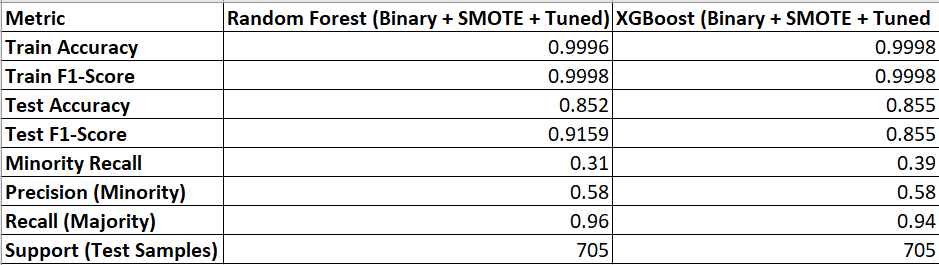

- XGBoost(SMOTE + tuned hyperparameter) achieves an F1-score of 0.916 slightly outperforming  Random Forest 0.915, representing a 1.5% relative improvement.
- Both models achieve near-perfect accuracy, indicating some overfitting but XGBoost generalizes slightly better. 
- Compared to Random Forest and Logistic Regression, XGBoost provides stronger generalization on an imbalanced binary target.
- Overall,  XGBoost serves as a a high-quality, deployable baseline, offering strong performance with interpretability.
- This outcomes justify transitioning to deep learning(DistilBERT) to capture deeper semantic understanding and extend analysis to multiclass sentiment classification.

### Deep Learning
#### Using DistilBERT Transfer Learning Model(Hugging Face Transformers)
**Binary classification DistilBERT** 

In [79]:
# Data augmentation for Class imbalance negative class
print("Augmenting for Class Imbalance")
negatives = binary_df[binary_df["sentiment_simple"]=="Negative"]["text"]
augmenter = naw.SynonymAug(aug_src="wordnet", aug_p=0.3)

# Augment 
def safe_augment(text):
    aug_text = augmenter.augment(text)
    if isinstance(aug_text, list):
        return aug_text[0]
    return aug_text
    
augmented_neg = negatives.apply(safe_augment)
augmented_df = pd.DataFrame({"text": augmented_neg, "sentiment_simple": "Negative"})

#Combine and shuffle
balanced_df = pd.concat([binary_df, augmented_df]).sample(frac=1, random_state=42)
print("Class balance:", balanced_df["sentiment_simple"].value_counts())

Augmenting for Class Imbalance
Class balance: sentiment_simple
Positive    2957
Negative    1136
Name: count, dtype: int64


In [80]:
#prepare data and map labels
balanced_df["label"] = balanced_df["sentiment_simple"].map({"Negative":0, "Positive":1}).astype(int)

X = balanced_df["text"]
y= balanced_df["label"]

# train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42, stratify=y)

print("Train Size:", len(X_train_text))
print("Test size:", len(X_test_text))

Train Size: 3274
Test size: 819


In [81]:
# create dataset
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = list(texts)
        self.labels = list(labels)
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
				)
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item["labels"] = torch.tensor(label, dtype=torch.long)
        return item
max_len = 160
batch_size =16

In [82]:

#load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
train_dataset = TweetDataset(X_train_text.tolist(), y_train.tolist(), tokenizer, max_len)
test_dataset = TweetDataset(X_test_text.tolist(), y_test.tolist(), tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [83]:
# focal loss
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, weight=None,  reduction="mean"):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.weight = weight
        self.reduction =  reduction
    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, weight=self.weight, reduction="none")
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.reduction == "mean":
           return focal_loss.mean()
        elif self.reduction == "sum":
            return focal_loss.sum()
        else:
            return focal_loss    

In [84]:
# class weights for imbalance
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_labels = y_train.to_list()
class_counts = np.bincount(train_labels)
class_weights = torch.tensor(len(train_labels) / (2.0 * class_counts), dtype=torch.float).to(device)
loss_fn = FocalLoss(gamma=2, weight=class_weights)

In [85]:
# model and optimizer setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
model.to(device)

# unfreeze all layers
for param in model.parameters():
    param.requires_grad =True

optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
epochs = 2

total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=0, num_training_steps=total_steps
    )

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Tracking experiments and results live using Weights and Biases(WandB)**

In [86]:
#initialize WandB
wandb.login()

config={
		"model_name": "distilbert-base-uncased",
    "epochs":2,
		"batch_size":16,
		"learning_rate":2e-5,
		"max_len": 160,
		"weight_decay":0.01
	}

wandb.init(project="sentiment_analysis_distilbert", config=config)
config = wandb.config

wandb: Currently logged in as: mercykirwa24 (mercykirwa24-self) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [87]:
#training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}")
    for batch in progress_bar:
            optimizer.zero_grad()
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
                   
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            loss = loss_fn(logits, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()
            
            train_loss += loss.item()
            avg_loss = train_loss / (len(progress_bar) + 1)
            progress_bar.set_postfix({"loss": f"{avg_loss}"})
    print(f"Epoch {epoch+1}/{epochs} | Train loss: {train_loss/len(train_loader):.4f}")

Epoch 1: 100%|██████████| 205/205 [35:48<00:00, 10.48s/it, loss=0.12158246775094456]  


Epoch 1/2 | Train loss: 0.1222


Epoch 2: 100%|██████████| 205/205 [26:20<00:00,  7.71s/it, loss=0.06127695110061396] 

Epoch 2/2 | Train loss: 0.0616


In [88]:
# evaluation
model.eval()
preds, labels_all, probs_all, logits_all = [], [], [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
        probs_all.extend(torch.softmax(logits, dim=1)[:, 1].cpu().numpy())
        logits_all.append(logits.cpu())
        labels_all.extend(labels.cpu().numpy())
        
logits_all = torch.cat(logits_all)
        
# Evaluation Metrics
print("Final Binary Metrics")
print("Accuracy:", accuracy_score(labels_all, preds))
print("Precision:", precision_score(labels_all, preds, average="macro"))
print("Recall:", recall_score(labels_all, preds, average="macro"))
print("F1-score (macro):", f1_score(labels_all, preds, average="macro"))
print(classification_report(labels_all, preds, target_names=["Negative", "Positive"]))

Final Binary Metrics
Accuracy: 0.8864468864468864
Precision: 0.8514432949494424
Recall: 0.9024400226217406
F1-score (macro): 0.8688496644919339
              precision    recall  f1-score   support

    Negative       0.73      0.94      0.82       227
    Positive       0.97      0.87      0.92       592

    accuracy                           0.89       819
   macro avg       0.85      0.90      0.87       819
weighted avg       0.91      0.89      0.89       819



In [89]:
wandb.log({
    "accuracy": accuracy_score(labels_all, preds), 
    "precision_macro": precision_score(labels_all, preds, average="macro"),
    "recall": recall_score(labels_all, preds, average="macro"),
    "F1_macro": f1_score(labels_all, preds, average="macro"),
})

F1_macro,▁
accuracy,▁
precision_macro,▁
recall,▁
F1_macro,0.86885
accuracy,0.88645
precision_macro,0.85144
recall,0.90244


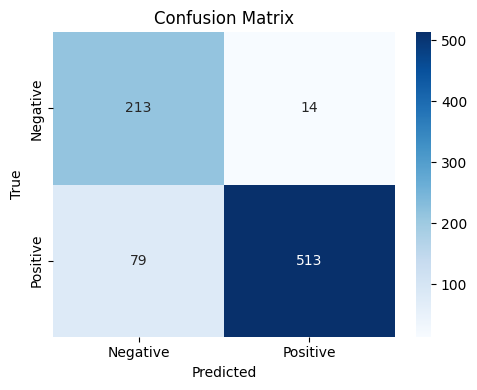

In [90]:
#visualize confusion matrix
wandb.init(
    project="sentiment_analysis_distilbert",
    config={
        "model_name": "distilbert-base-uncased",
        "epochs": 2,
        "batch_size": 16,
        "learning_rate": 2e-5,
        "max_len": 160,
        "weight_decay": 0.01
    }
)
cm = confusion_matrix(labels_all, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt.gcf())})
plt.show()
plt.close()

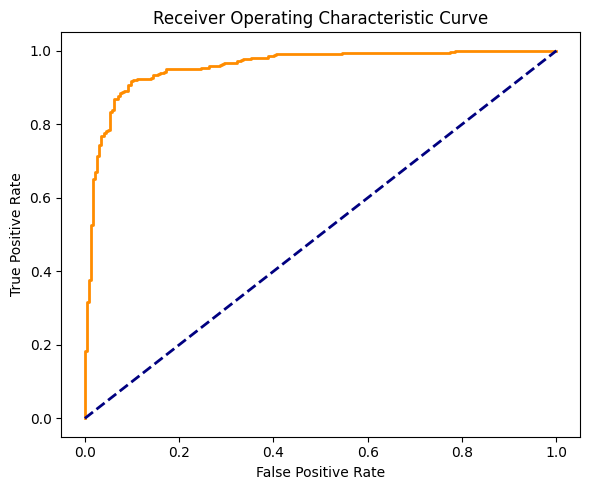

In [91]:
#visualize roc-auc
wandb.init(
    project="sentiment_analysis_distilbert",
    config={
        "model_name": "distilbert-base-uncased",
        "epochs": 2,
        "batch_size": 16,
        "learning_rate": 2e-5,
        "max_len": 160,
        "weight_decay": 0.01
    }
)

fpr, tpr, _ =roc_curve(labels_all, probs_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", linestyle="--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt.gcf())})
plt.show()
plt.close()

In [92]:
#torch.save(model.state_dict(), "distillbert_sentiment_model.pt")
#wandb.save("distilbert_sentiment_model.pt")
#wandb.finish()

In [94]:
model_save_path = "saved_models/binary_distilbert_test"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)


('saved_models/binary_distilbert_test\\tokenizer_config.json',
 'saved_models/binary_distilbert_test\\special_tokens_map.json',
 'saved_models/binary_distilbert_test\\vocab.txt',
 'saved_models/binary_distilbert_test\\added_tokens.json')

**Multiclass Sentiment Classification using DistilBert**

In [95]:
# Data augmentation for Class imbalance negative class
print("Origin for Class Counts")
negatives = df[df["sentiment_simple"]=="Negative"]["text"]
augmenter = naw.SynonymAug(aug_src="wordnet", aug_p=0.3)

# Augment 
def safe_augment(text):
    aug_text = augmenter.augment(text)
    if isinstance(aug_text, list):
        return aug_text[0]
    return aug_text
    
augmented_neg = negatives.sample(frac=1, random_state=42).apply(safe_augment)
augmented_df = pd.DataFrame({"text": augmented_neg, "sentiment_simple": "Negative"})

#Combine and shuffle
balanced_df = pd.concat([df, augmented_df]).sample(frac=1, random_state=42)
print("Balanced Class Count:", balanced_df["sentiment_simple"].value_counts())

Origin for Class Counts
Balanced Class Count: sentiment_simple
Neutral     4786
Positive    2957
Negative    1136
Name: count, dtype: int64


In [96]:
#prepare data and map labels
label_map = {"Negative": 0, "Neutral": 1, "Positive":2}
balanced_df["label"] = balanced_df["sentiment_simple"].map(label_map)

X = balanced_df["text"]
y= balanced_df["label"]

# train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42, stratify=y)

print("Train Size:", len(X_train_text))
print("Test size:", len(X_test_text))

Train Size: 7103
Test size: 1776


In [97]:
# create dataset
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = list(texts)
        self.labels = list(labels)
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
				)
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item["labels"] = torch.tensor(label, dtype=torch.long)
        return item
max_len = 160
batch_size =16

In [98]:
#load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
train_dataset = TweetDataset(X_train_text.tolist(), y_train.tolist(), tokenizer, max_len)
test_dataset = TweetDataset(X_test_text.tolist(), y_test.tolist(), tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [99]:
# model and optimizer setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)
model.to(device)

# unfreeze all layers
for param in model.parameters():
    param.requires_grad =True

optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
epochs = 2

total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=0, num_training_steps=total_steps
    )
# class weights for imbalance
train_labels = y_train.to_list()
class_counts = np.bincount(train_labels)
class_weights = torch.tensor(len(train_labels) / (2.0 * class_counts), dtype=torch.float).to(device)
loss_fn = FocalLoss(gamma=2, weight=class_weights)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [100]:
#initialize WandB
wandb.login()

config={
		"model_name": "distilbert-base-uncased",
    "epochs":2,
		"batch_size":16,
		"learning_rate":2e-5,
		"max_len": 160,
		"weight_decay":0.01
	}

wandb.init(project="sentiment_analysis_distilbert", config=config)
config = wandb.config

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


In [102]:
#training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}")
    for batch in progress_bar:
            optimizer.zero_grad()
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
                   
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            loss = loss_fn(logits, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()
            
            train_loss += loss.item()
            avg_loss = train_loss / (len(progress_bar) + 1)
            progress_bar.set_postfix({"loss": f"{avg_loss}"})
    print(f"Epoch {epoch+1}/{epochs} | Train loss: {train_loss/len(train_loader):.4f}")

Epoch 1:   0%|          | 0/444 [00:00<?, ?it/s]

Epoch 1: 100%|██████████| 444/444 [2:15:56<00:00, 18.37s/it, loss=0.6179110209258755]       


Epoch 1/2 | Train loss: 0.6193


Epoch 2: 100%|██████████| 444/444 [55:16<00:00,  7.47s/it, loss=0.39071483146608543]

Epoch 2/2 | Train loss: 0.3916


In [103]:
# evaluation
model.eval()
preds, labels_all, probs_all, logits_all = [], [], [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=1)
        
        preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
        probs_all.extend(probs.cpu().numpy())
        logits_all.append(logits.cpu())
        labels_all.extend(labels.cpu().numpy())
        
logits_all = torch.cat(logits_all)
        
# Evaluation Metrics
print("Final Multiclass Metrics")
print("Accuracy:", accuracy_score(labels_all, preds))
print("Precision:", precision_score(labels_all, preds, average="macro"))
print("Recall:", recall_score(labels_all, preds, average="macro"))
print("F1-score (macro):", f1_score(labels_all, preds, average="macro"))
print(classification_report(labels_all, preds, target_names=["Negative", "Neutral", "Positive"]))

Final Multiclass Metrics
Accuracy: 0.6525900900900901
Precision: 0.6665049812276667
Recall: 0.7098684259363282
F1-score (macro): 0.6685504641784042
              precision    recall  f1-score   support

    Negative       0.65      0.81      0.72       227
     Neutral       0.80      0.53      0.64       957
    Positive       0.54      0.79      0.64       592

    accuracy                           0.65      1776
   macro avg       0.67      0.71      0.67      1776
weighted avg       0.70      0.65      0.65      1776



In [104]:
wandb.log({
    "accuracy": accuracy_score(labels_all, preds), 
    "precision_macro": precision_score(labels_all, preds, average="macro"),
    "recall": recall_score(labels_all, preds, average="macro"),
    "F1_macro": f1_score(labels_all, preds, average="macro"),
})

F1_macro,▁
accuracy,▁
precision_macro,▁
recall,▁
F1_macro,0.66855
accuracy,0.65259
precision_macro,0.6665
recall,0.70987


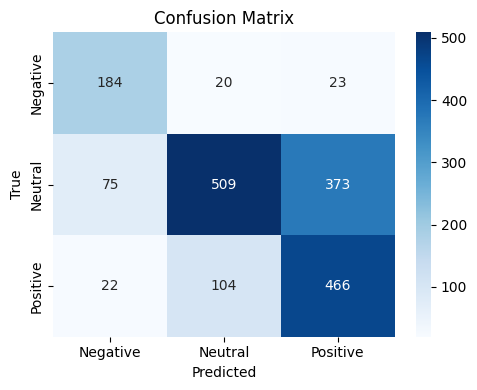

In [105]:
#visualize confusion matrix
wandb.init(
    project="sentiment_analysis_distilbert",
    config={
        "model_name": "distilbert-base-uncased",
        "epochs": 2,
        "batch_size": 16,
        "learning_rate": 2e-5,
        "max_len": 160,
        "weight_decay": 0.01
    }
)
cm = confusion_matrix(labels_all, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative","Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt.gcf())})
plt.show()
plt.close()

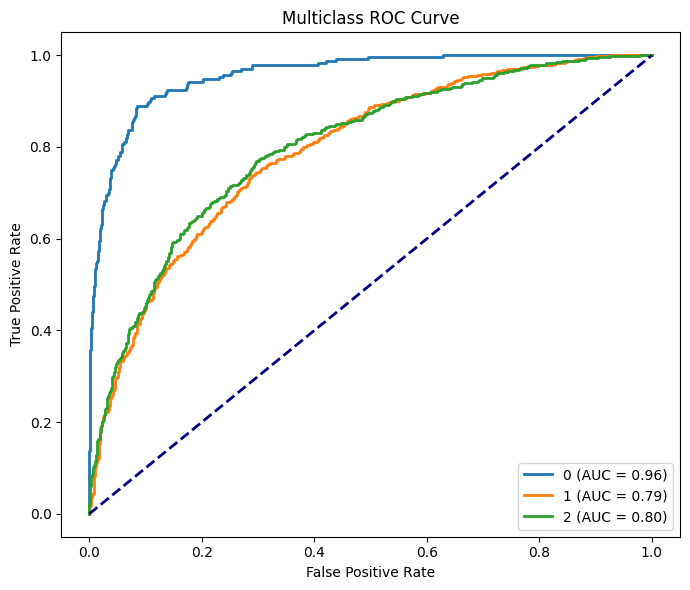

In [106]:
#visualize roc-auc
wandb.init(
    project="sentiment_analysis_distilbert",
    config={
        "model_name": "distilbert-base-uncased",
        "epochs": 2,
        "batch_size": 16,
        "learning_rate": 2e-5,
        "max_len": 160,
        "weight_decay": 0.01
    }
)

classes = [0, 1, 2]
y_true_bin = label_binarize(labels_all, classes=classes)
probs_all = np.array(probs_all)

plt.figure(figsize=(7,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ =roc_curve(y_true_bin[:, i], probs_all[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], color="navy", linestyle="--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt.gcf())})
plt.show()
plt.close()

In [107]:
model_path_multi = "saved_models/multiclass_distilbert"
model_multi = DistilBertForSequenceClassification.from_pretrained(model_path_multi)
tokenizer_multi = DistilBertTokenizer.from_pretrained(model_path_multi)


## Evaluation

**Comparing Binary and Multiclass DistilBERT model**

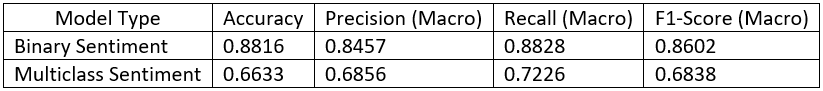

- **Binary model** shows a strong recall for Negative tweets(0.90) which is excellent for identifying  as it aligns with our objective of catchimg critical negative sentiments.
- There is a slight drop in Positive recall(0.81), but overall class balance remain solid.
- The Binary model achieves higher overall accuracy and F1 compared to multiclass model, confirming its superior realibility.
- **Multiclass model** records a Negative recall drop slightly to 0.82 which is still decent but not as strong as binary version.
- Neutral tweets remain the most challenging to classify, recall at only 0.58 indicating semantic overlap with other classes.
- Overall accuracy is much lower at 0.66 showing increased misclassifications due to added complexity of three sentiment categories.

**Binary model** is better aligned with our stakeholder needs, reliably detecting Negative tweets to flag potential issues or dissatisfaction.

**Multiclass model** provides contextual insights by distinguishing Neutral sentiment, but performance is constraint by class imbalance and limited data.

### **Final Recommendations**

Since the primary objective is to maximize detection of Negative tweets, which is serves as critical alert for distributors or product analyst, binary sentimentbmodel is currently the best choice for deployment.

The multiclass model provides valuable context for trend visualization across all sentiment categories, but should not replace the binary model for alerting purposes. It will compliment the binary model by offering insights into overall brand sentiment dynamics

### **Next Steps** 
1. Deploy the binary model using Streamlit dashboard with the folowing features:
- Binary alerts to highlight red flags for Negative tweets.
- Multiclass insights to visualize brand-level sentiment trends from the multiclass predictions.
- Filters to allow users to filter by brand(Apple/Google), date or product.

2. Implement WandB monitoring to track metrics such as class-wise precision, recall, F1 over time, helping to detect model drift

3. Establish a retraining plan::
- Schedule retraining monthly or quaterly to ensure model performance for minority classes like Negative tweets.
- Incoporates new human-annoted data to improve detection and maintain high recall on critical alerts.

## Deployment

In [108]:
# Streamlit Deployment Skeleton
# load model and tokenizer
MODEL_PATH = "saved_models/binary_distilbert"
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_PATH)
model = DistilBertForSequenceClassification.from_pretrained(MODEL_PATH)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

MODEL_PATH_MULTI = "saved_models/multiclass_distilbert"
tokenizer_multi = DistilBertTokenizer.from_pretrained(MODEL_PATH_MULTI)
model_multi = DistilBertForSequenceClassification.from_pretrained(MODEL_PATH_MULTI)
device_multi = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_multi.to(device_multi)
model_multi.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [109]:
# wandb init for monitoring
wandb.init(
    project="sentiment_analysis_distilbert",
    name="streamlit_inference", 
    config={
        "binary_model_path": MODEL_PATH,
        "multiclass_model_path": MODEL_PATH_MULTI,
        "batch_size": 16,
        "max_len": 160
		}
)

In [110]:
#sidebar for filters
st.sidebar.header("Filters")
uploaded_file = st.sidebar.file_uploader("Upload CSV file with tweets", type=["csv"])
selected_brand = st.sidebar.selectbox("Select Brand", ["All", "Apple", "Google"])

2025-10-19 02:09:51.314 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:09:51.697 
  command:

    streamlit run c:\Users\USER\anaconda3\envs\sentiment_env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-19 02:09:51.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:09:51.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:09:51.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:09:51.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:09:51.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:09:51.721 Threa

In [111]:
# dataset for inference
class TweetDataset(Dataset):
    def __init__(self, texts, tokenizer, labels= None, max_len=160):
        """
        Dataset class for tweets for inference or training.
                
        Args:
        texts (list or pd.series): List of tweet texts.
        tokenizer (PreTrainedTokenizer): Tokenizer for the model.
        labels (list, optional): Optional labels for supervised. Defaults to None.
        max_len (int, optional):; Max token length. Defaults to 160            
       """
        self.texts = list(texts)
        self.labels = list(labels) if labels is not None else [0]*len(texts)
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
				)
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        if self.labels is not None:
            item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
                
        

dataset = TweetDataset(df["text"], tokenizer, max_len=160)
loader = DataLoader(dataset, batch_size=16, shuffle=False)

dataset_multi = TweetDataset(df["text"], tokenizer_multi, max_len=160)
loader_multi = DataLoader(dataset_multi, batch_size=16, shuffle=False)

In [112]:
#main
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    
    # check required columns
    required_cols = ["brand", "text"]
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
         st.error(f"Missing columns in uploaded file: {', '.join(missing_cols)}")
    else:
        apple_products = ["iPad", "Apple", "iPad or iPhone App", "iPhone", "Other Apple product or service"]
        google_products = ["Google", "Other Google product or service", "Android", "Android App"]
        df["parent_brand"] = df["brand"].apply(
                        lambda x: "Apple" if x in apple_products else ("Google" if x in google_products else "Other")
                      )
        df = df[df["parent_brand"].isin(["Apple", "Google"])]
        if selected_brand != "All":
            df = df[df["parent_brand"] == selected_brand]

st.success(f"Loaded {len(df)} tweets after filtering.")
st.dataframe(df.head(10))

2025-10-19 02:10:09.925 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:10:09.929 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:10:09.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:10:10.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:10:10.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:10:10.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [113]:
# detect available device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def predict_binary(text_list, batch_size=16):
    preds_all, probs_neg_all = [], []
    i = 0

    
    pbar = tqdm(total=len(text_list), desc="Generating Predictions")

    while i < len(text_list):
        try:
            
            batch = text_list[i:i + batch_size]
            model_inputs = tokenizer(
                batch,
                truncation=True,
                padding=True,
                max_length=160,
                return_tensors="pt"
            )

            input_ids = model_inputs["input_ids"].to(device)
            attention_mask = model_inputs["attention_mask"].to(device)

            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                probs = torch.softmax(logits, dim=1).cpu().numpy()
                preds = np.argmax(probs, axis=1)
                probs_neg = probs[:, 0]

            preds_all.extend(preds)
            probs_neg_all.extend(probs_neg)

            i += batch_size
            pbar.update(batch_size)

        except RuntimeError as e:
            
            if "out of memory" in str(e):
                torch.cuda.empty_cache()
                batch_size = max(4, batch_size // 2)
                print(f" Out of memory — reducing batch size to {batch_size}")
            else:
                raise e

    pbar.close()
    return np.array(preds_all), np.array(probs_neg_all)


sample_size = 500
preds_bin, probs_neg = predict_binary(df["text"].tolist()[:sample_size], batch_size=8)

Using device: cpu


Generating Predictions: 504it [00:17, 28.51it/s]                         


In [114]:

preds_bin, probs_neg = predict_binary(df["text"].tolist(), batch_size=16)

df["pred_label"] = preds_bin
df["negative_prob"] = probs_neg
df["binary_sentiment"] = df["pred_label"].apply(lambda x: "Negative" if x == 0 else "Positive")

Generating Predictions:   0%|          | 0/8311 [00:00<?, ?it/s]

Generating Predictions: 8320it [05:49, 23.80it/s]                          


In [115]:
def predict_multiclass(texts, batch_size=8):
    preds_all = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]

     
        enc = tokenizer_multi(
            batch_texts,
            truncation=True,
            padding=True,
            max_length=160,
            return_tensors="pt"
        ).to(device_multi)

        with torch.no_grad():
            outputs = model_multi(**enc)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()

        preds_all.extend(preds)

    return np.array(preds_all)
sample_preds = predict_multiclass(df["text"].tolist()[:500], batch_size=8)

In [116]:
df["pred_multiclass"] = predict_multiclass(df["text"].tolist(), batch_size=8)
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
df["multi_sentiment"] = df["pred_multiclass"].map(label_map)

In [117]:
# visualize
st.subheader("📊 Multiclass Sentiment Trends")
trend_df = df.groupby(["parent_brand", "multi_sentiment"]).size().unstack(fill_value=0)
st.bar_chart(trend_df)

wandb.log({"multiclass_trends": wandb.Table(dataframe=trend_df)})
st.caption("Sentiment distribution by brand (Positive / Neutral / Negative)")

2025-10-19 02:24:52.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:52.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:52.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:53.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:53.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:53.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:55.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:55.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [118]:
# Display binary alerts table(negative tweets)
st.subheader("🚨 Negative Tweets")
negative_alerts = df[df["binary_sentiment"] == "Negative"].sort_values(by="negative_prob", ascending=False)
st.dataframe(
    negative_alerts[["brand", "text", "negative_prob"]].style.applymap(
    lambda x: "background-color: #FFCCCC" if isinstance (x, (float,int)) and x > 0.7 else "")
        )   

2025-10-19 02:24:57.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:57.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:57.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:57.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:57.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:57.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-19 02:24:57.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

The **Streamlit App Features** are as follows:
- Binary Model Core
  - Detects negative tweets in real time.
  - Displays a red-flag alert table with `negative_prop` to prioritize critical tweets.

- Multiclass Model Insights
  - Generates Positive, Neutral, and Negative predictions for uploaded tweets.
  - Aggregates trends by `parent_brand` for clear visualizations.

- Filters
  - Sidebar filters for brand("Apple, Google, or All)
  - Dynamically shows model performance for Negative Class.

-WandB Intergration
  - Logs negative probabilities, binary predictions and multiclass trend tables
  - Enables monitoring of model performance and trends over time.

**Next Steps:** 

Copy the deployment code into `sentiment_app.py` to create the interactive Streamlit app. 
Then run it in the terminal using **streamlit run sentiment_app.py** then avail it online:

